# CS4035 - Cyber Data Analytics
## Lab 2 

## Group Number : 21

## Student 1 
### Name : Krzysztof Baran
### ID :

## Student 2
### Name : Michał Okoń
### ID : 5056640

In [50]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import ccf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
%matplotlib inline

In [95]:
# If this cell does not work try running ``

import nbformat

nb = nbformat.read("Lab2.ipynb", nbformat.NO_CONVERT)
word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))

print("Word count:", word_count)

Word count: 1132


## 1. Familiarization task – 1 A4

### 1a. Plot visualizations 

In [52]:
train_data_path = os.path.join(os.getcwd(), "data", "train_data.csv")
val_data_path = os.path.join(os.getcwd(), "data", "val_data.csv")
test_data_path = os.path.join(os.getcwd(), "data", "test_data.csv")

train_data_df = pd.read_csv(train_data_path)
train_data_df.set_index('Id', inplace=True)
val_data_df = pd.read_csv(val_data_path)
val_data_df.set_index('Id', inplace=True)
test_data_df = pd.read_csv(test_data_path)
test_data_df.set_index('Id', inplace=True)

In [53]:
train_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496800 entries, 0 to 496799
Data columns (total 53 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Timestamp  496800 non-null  object 
 1   FIT101     496800 non-null  float64
 2   LIT101     496800 non-null  float64
 3   MV101      496800 non-null  int64  
 4   P101       496800 non-null  int64  
 5   P102       496800 non-null  int64  
 6   AIT201     496800 non-null  float64
 7   AIT202     496800 non-null  float64
 8   AIT203     496800 non-null  float64
 9   FIT201     496800 non-null  float64
 10  MV201      496800 non-null  int64  
 11  P201       496800 non-null  int64  
 12  P202       496800 non-null  int64  
 13  P203       496800 non-null  int64  
 14  P204       496800 non-null  int64  
 15  P205       496800 non-null  int64  
 16  P206       496800 non-null  int64  
 17  DPIT301    496800 non-null  float64
 18  FIT301     496800 non-null  float64
 19  LIT301     496800 non-n

Train Data

In [54]:
train_data_df

Timestamp    FIT101    LIT101  MV101  P101  P102  \
Id                                                                      
0        22/12/2015 4:00:00 PM  2.470294  261.5804      2     2     1   
1        22/12/2015 4:00:01 PM  2.457163  261.1879      2     2     1   
2        22/12/2015 4:00:02 PM  2.439548  260.9131      2     2     1   
3        22/12/2015 4:00:03 PM  2.428338  260.2850      2     2     1   
4        22/12/2015 4:00:04 PM  2.424815  259.8925      2     2     1   
...                        ...       ...       ...    ...   ...   ...   
496795   28/12/2015 9:59:55 AM  2.460366  523.0430      2     2     1   
496796   28/12/2015 9:59:56 AM  2.448836  522.9645      2     2     1   
496797   28/12/2015 9:59:57 AM  2.434744  522.8860      2     2     1   
496798   28/12/2015 9:59:58 AM  2.428338  522.9252      2     2     1   
496799   28/12/2015 9:59:59 AM  2.427057  522.8467      2     2     1   

          AIT201    AIT202    AIT203    FIT201  ...  P501  P502     PIT501  \
Id                                              ...                          
0       244.3284  8.190080  306.1010  2.471278  ...     1     1   10.02948   
1       244.3284  8.190080  306.1010  2.468587  ...     1     1   10.02948   
2       244.3284  8.190080  306.1010  2.467305  ...     1     1   10.02948   
3       244.3284  8.190080  306.1010  2.466536  ...     1     1   10.02948   
4       244.4245  8.190080  306.1010  2.466536  ...     1     1   10.02948   
...          ...       ...       ...       ...  ...   ...   ...        ...   
496795  262.0161  8.396437  328.5055  2.442316  ...     2     1  250.81710   
496796  262.0161  8.396437  328.5055  2.442316  ...     2     1  250.81710   
496797  262.0161  8.396437  328.6337  2.444879  ...     2     1  250.81710   
496798  262.0161  8.396437  328.6337  2.445391  ...     2     1  250.81710   
496799  262.0161  8.396437  328.6337  2.445391  ...     2     1  250.86520   

          PIT502      PIT503    FIT601  P601  P602  P603  Label  
Id                                                               
0       0.000000    4.277749  0.000256     1     1     1      0  
1       0.000000    4.277749  0.000256     1     1     1      0  
2       0.000000    4.277749  0.000256     1     1     1      0  
3       0.000000    4.277749  0.000256     1     1     1      0  
4       0.000000    4.277749  0.000256     1     1     1      0  
...          ...         ...       ...   ...   ...   ...    ...  
496795  1.778105  189.855200  0.000128     1     1     1      0  
496796  1.778105  189.502700  0.000128     1     1     1      0  
496797  1.778105  189.502700  0.000128     1     1     1      0  
496798  1.649953  189.502700  0.000128     1     1     1      0  
496799  1.649953  189.598800  0.000128     1     1     1      0  

[496800 rows x 53 columns]

Plotting the whole dataset to see the general trends

53


<Figure size 640x480 with 0 Axes>

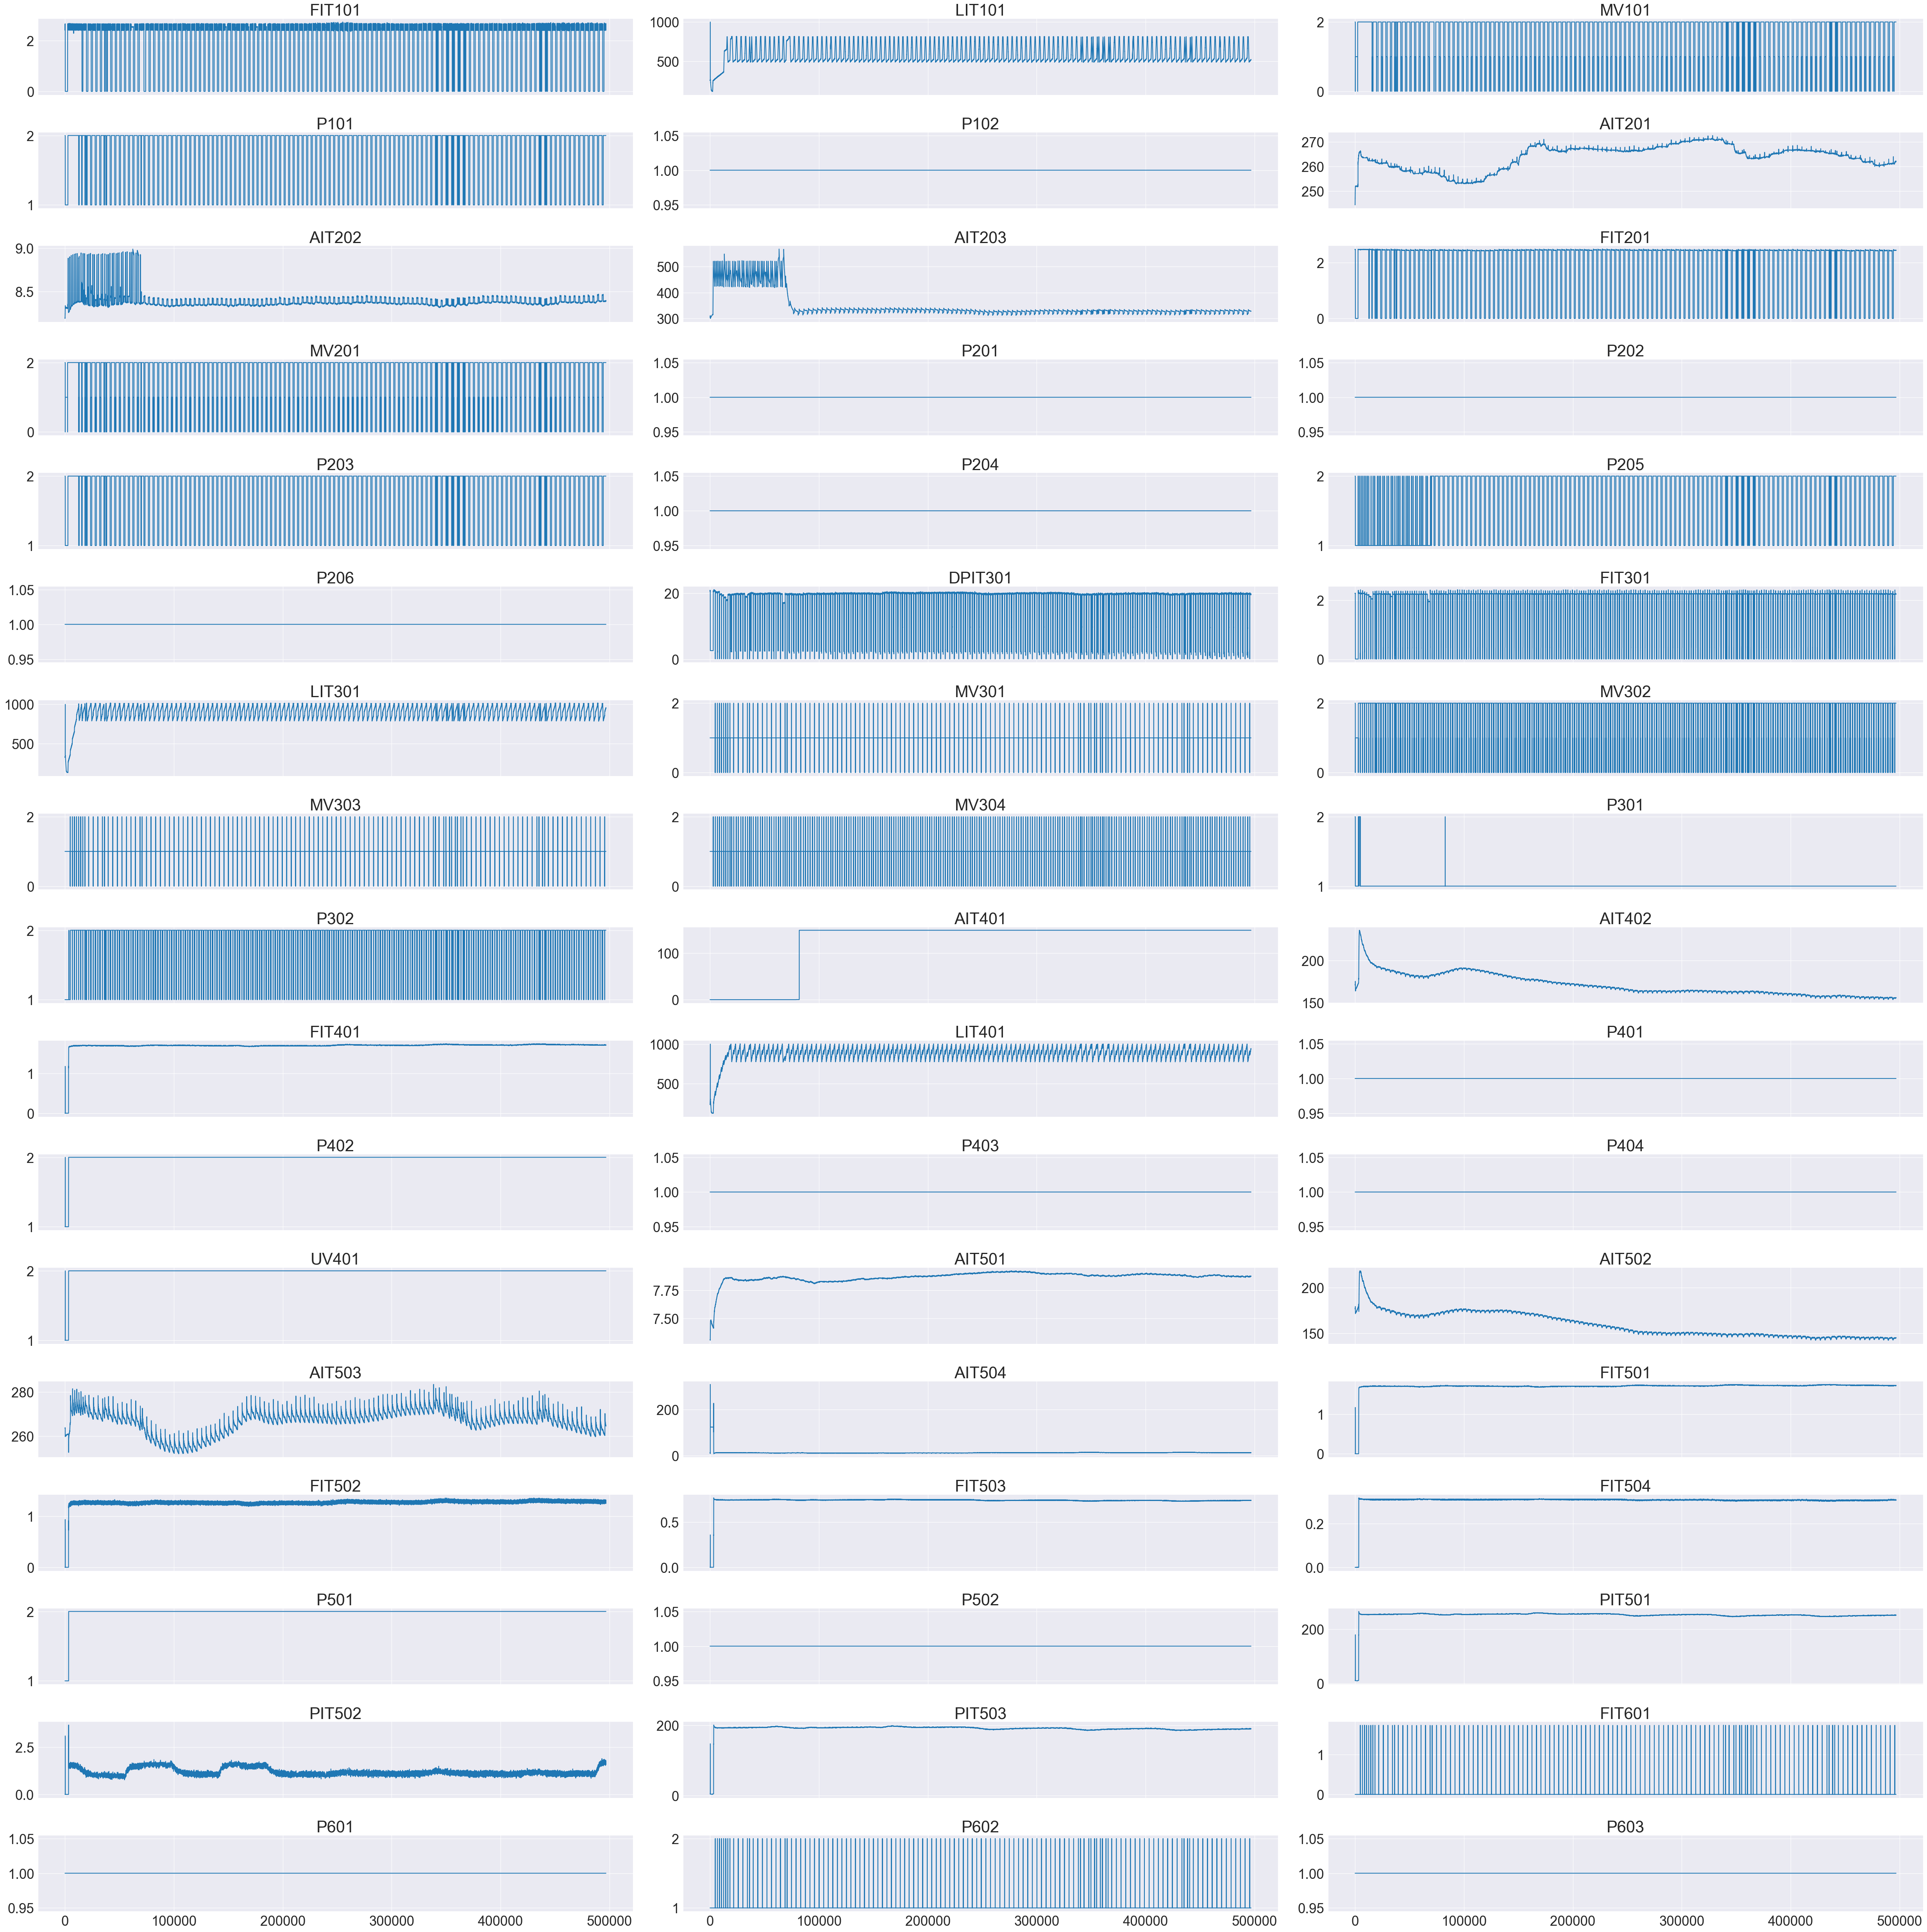

In [55]:
# Plot all 51 columns in train_data
print(train_data_df.shape[1])
plt.clf()
fig, axes = plt.subplots(17, 3, figsize=(50, 50), sharex=True)
# Change the font size
plt.rcParams.update({'font.size': 25})
for i, ax in enumerate(axes.flatten()):
    ax.plot(train_data_df.iloc[:, i + 1])
    ax.set_title(train_data_df.columns[i + 1])
    # Adjust the tick sizes
    ax.tick_params(axis='both', which='major', labelsize=25)
    ax.tick_params(axis='both', which='minor', labelsize=25)

plt.tight_layout()
plt.show()

Plotting the signals in the medium-scale to closer examine the cyclic behavior in the first 6 hours of the signal.


<Figure size 640x480 with 0 Axes>

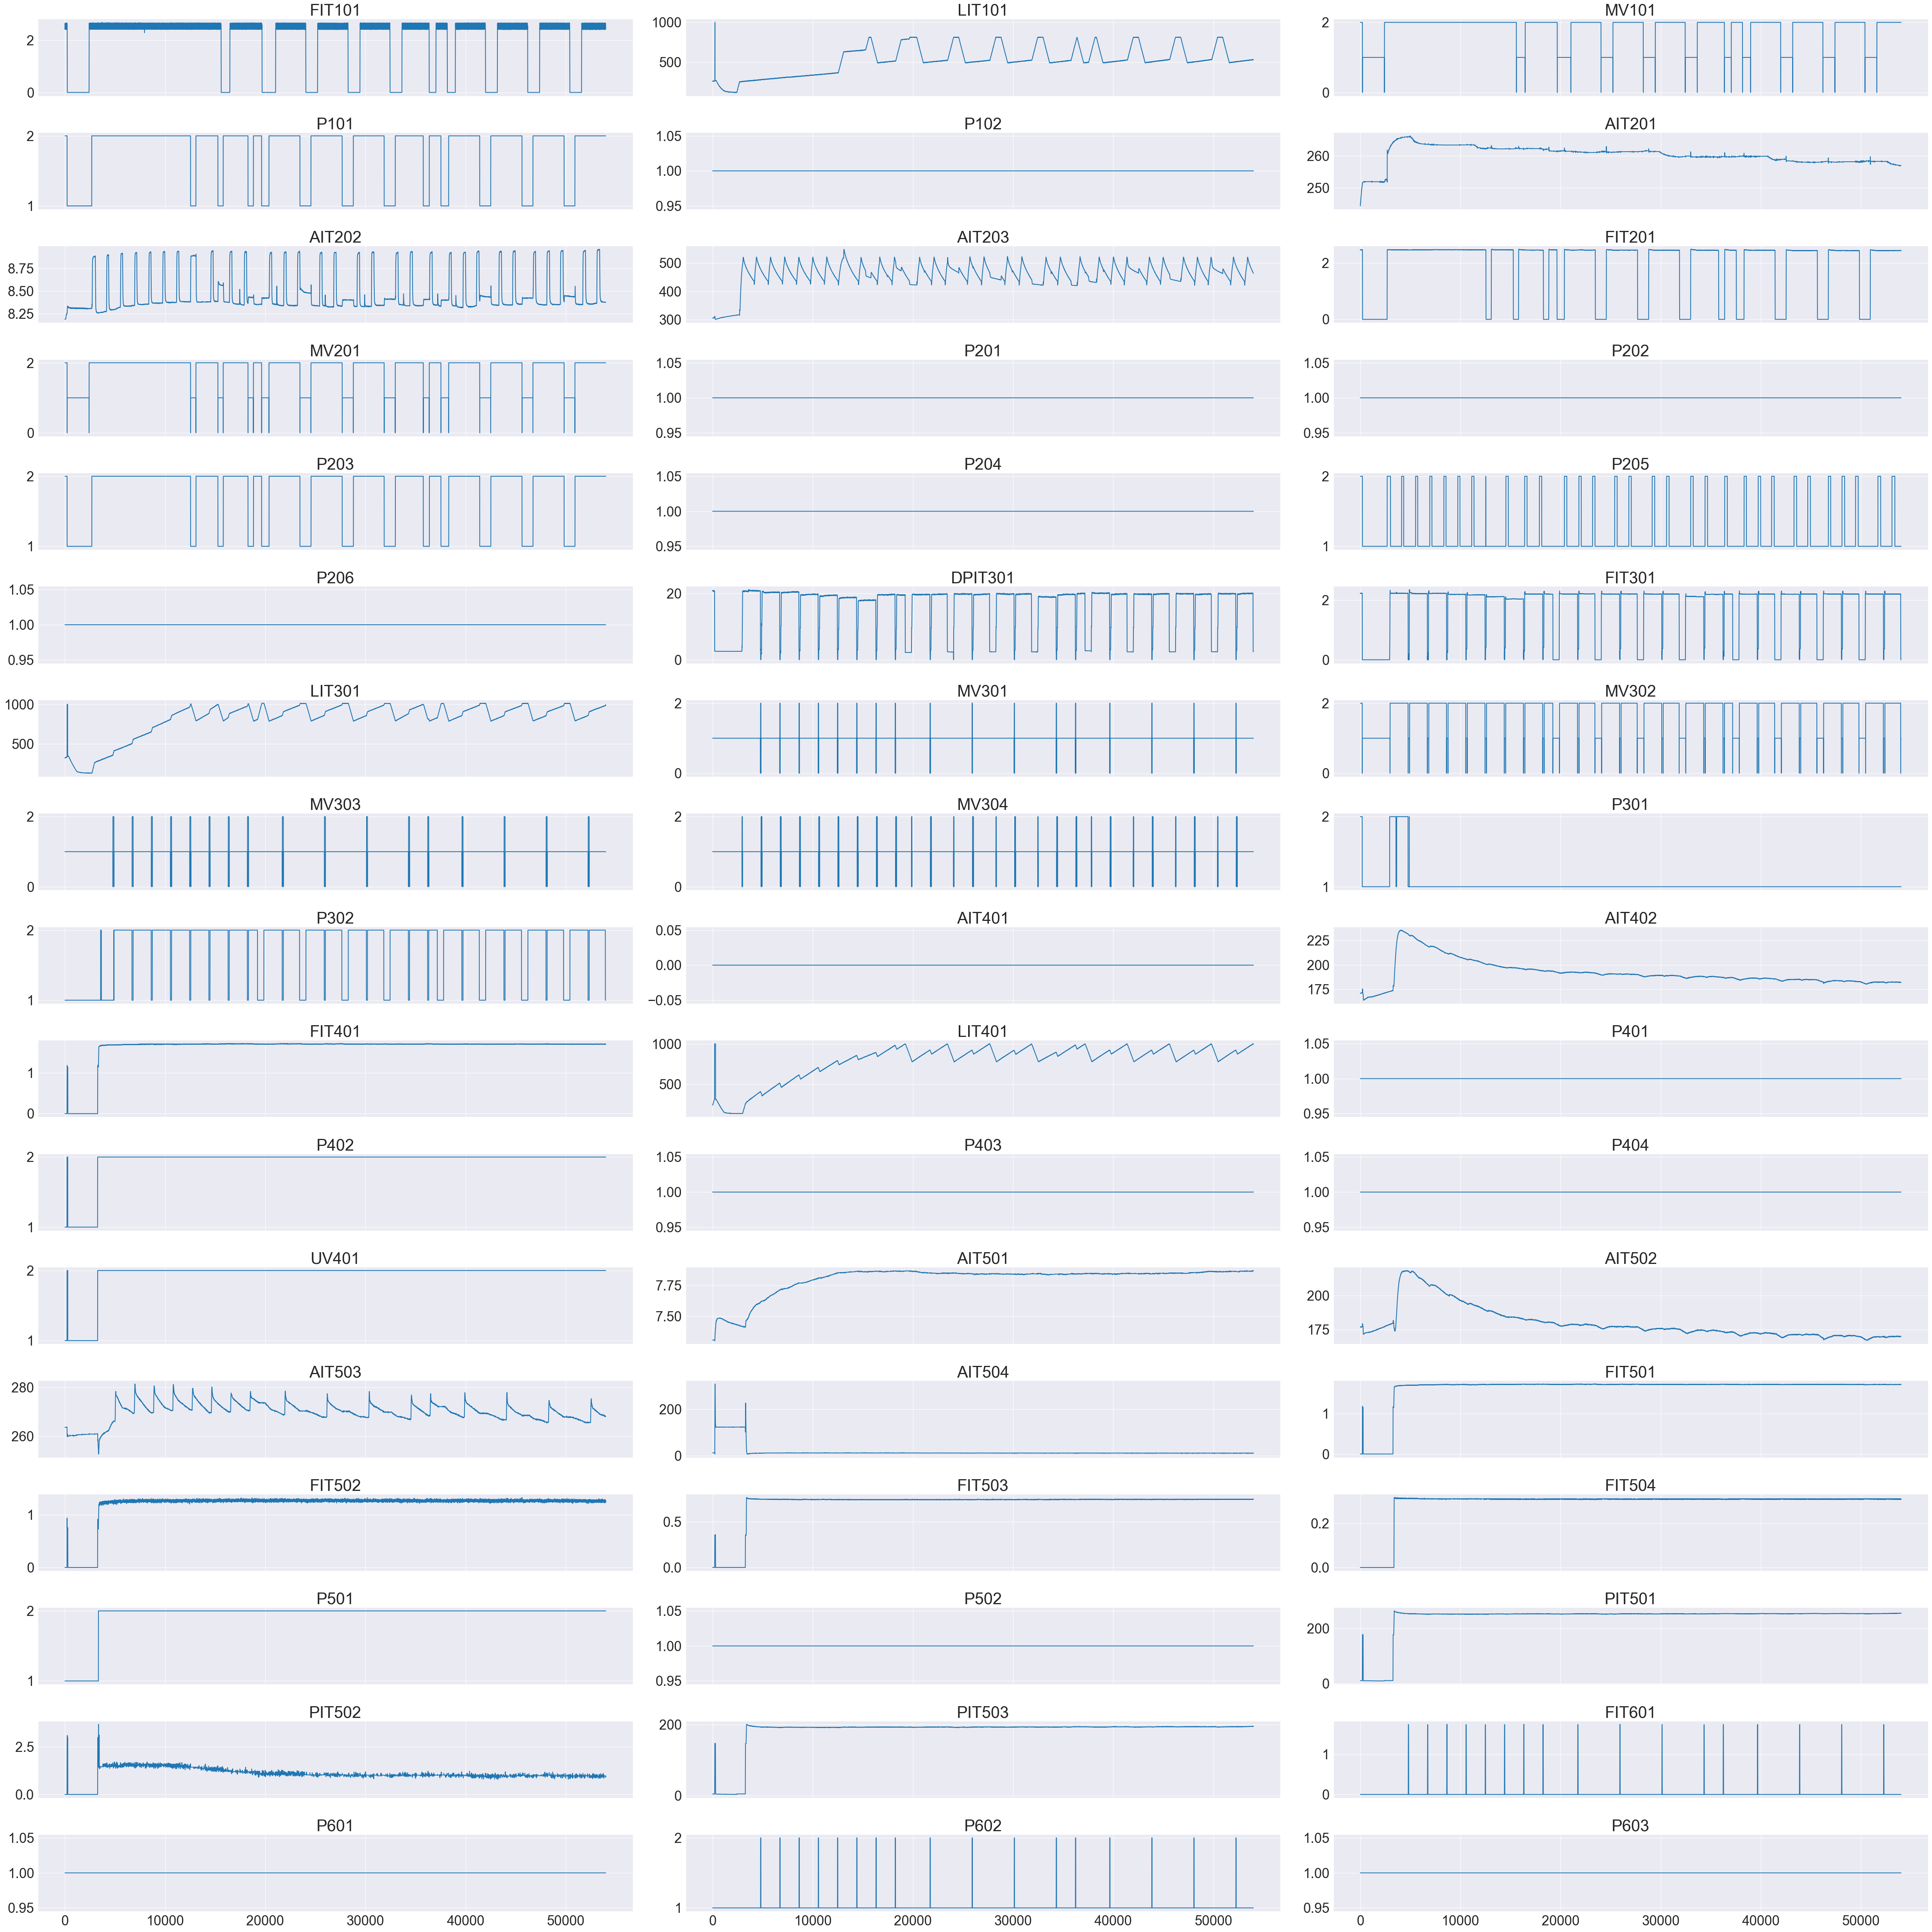

In [56]:
assert train_data_df.shape[1] >= 51, f"Expected at least 51 columns, but got {train_data_df.shape[1]}"

# Plot all 51 columns in train_data_df

plt.clf()
fig, axes = plt.subplots(17, 3, figsize=(50, 50), sharex=True)
# Change the font size
plt.rcParams.update({'font.size': 25})
time_to_plot = 54000
for i, ax in enumerate(axes.flatten()):
    ax.plot(train_data_df.iloc[:time_to_plot, i + 1])
    ax.set_title(train_data_df.columns[i + 1])
    # Adjust the tick sizes
    ax.tick_params(axis='both', which='major', labelsize=25)
    ax.tick_params(axis='both', which='minor', labelsize=25)

plt.tight_layout()
plt.show()

Plotting the signals in the medium-scale to closer examine the cyclic behavior after the first 6 hours of the signal.

<Figure size 640x480 with 0 Axes>

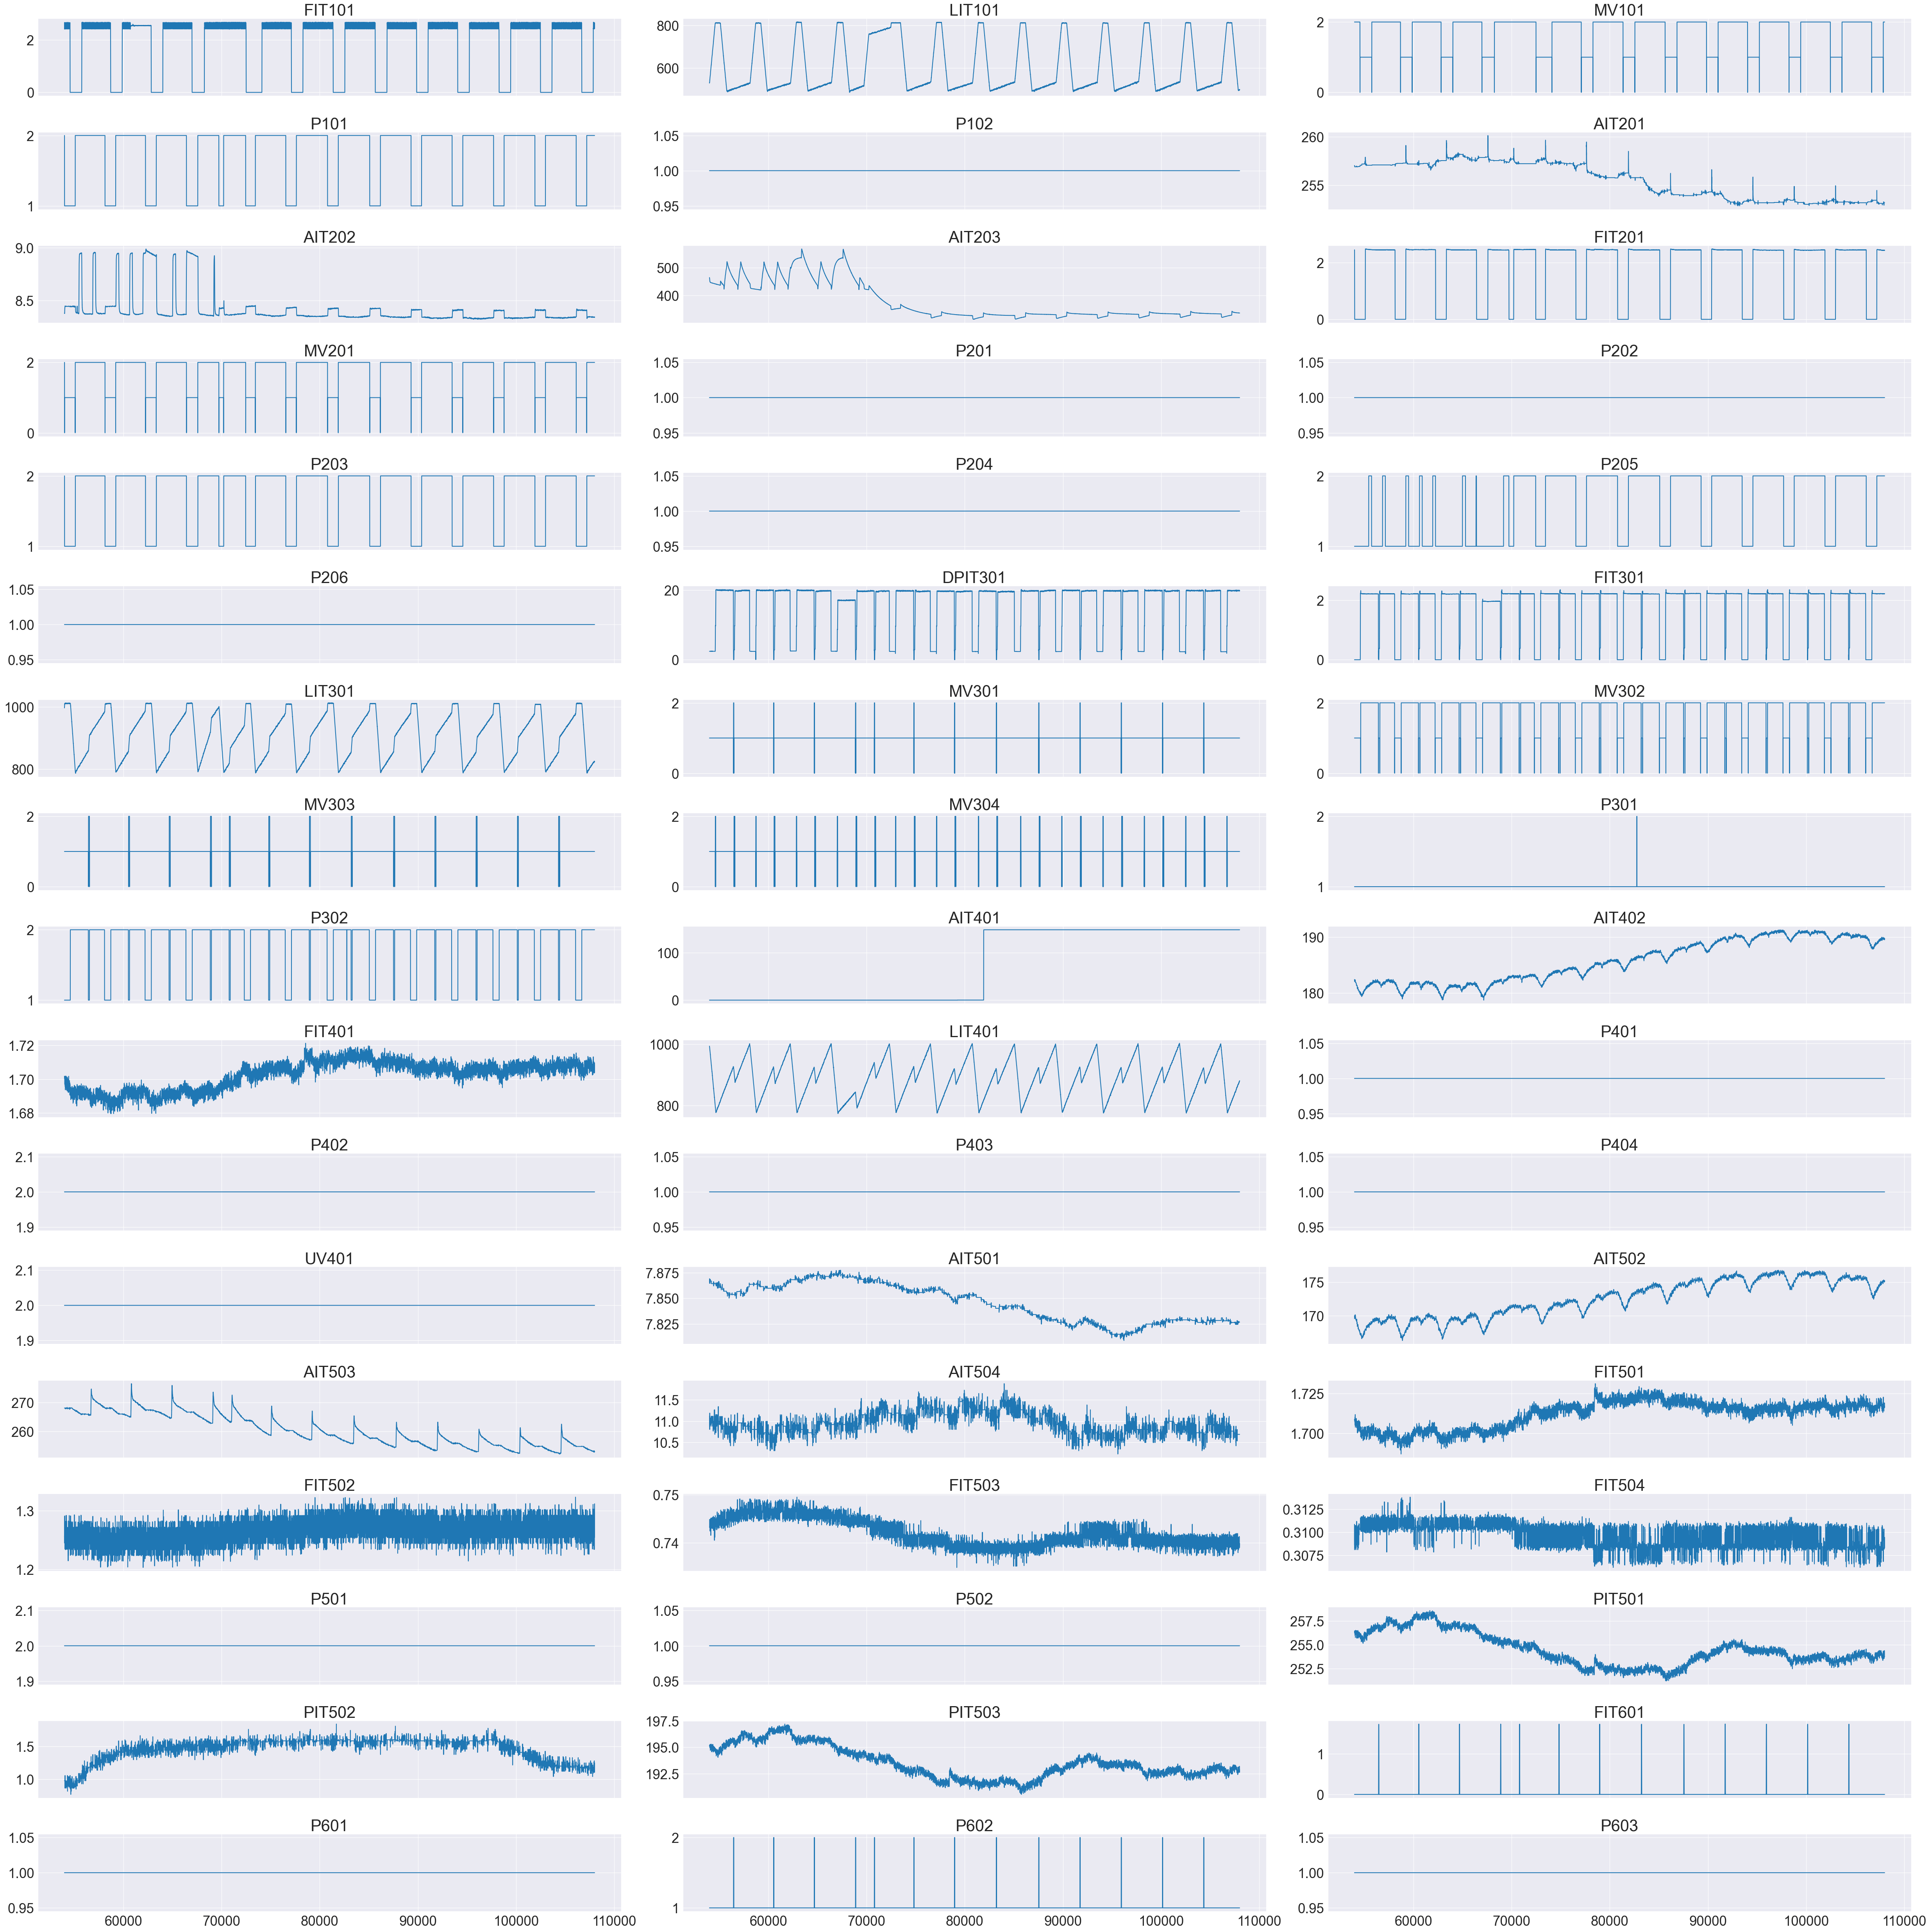

In [57]:
assert train_data_df.shape[1] >= 51, f"Expected at least 51 columns, but got {train_data_df.shape[1]}"

# Plot all 51 columns in train_data_df

plt.clf()
fig, axes = plt.subplots(17, 3, figsize=(50, 50), sharex=True)
# Change the font size
plt.rcParams.update({'font.size': 25})
time_to_plot = 54000
for i, ax in enumerate(axes.flatten()):
    ax.plot(train_data_df.iloc[time_to_plot:2 * time_to_plot, i + 1])
    ax.set_title(train_data_df.columns[i + 1])
    # Adjust the tick sizes
    ax.tick_params(axis='both', which='major', labelsize=25)
    ax.tick_params(axis='both', which='minor', labelsize=25)

plt.tight_layout()
plt.show()

Plotting the signals in the micro-scale to see some trends that only occur in short time frames and types of noise that occurs in the data

<Figure size 640x480 with 0 Axes>

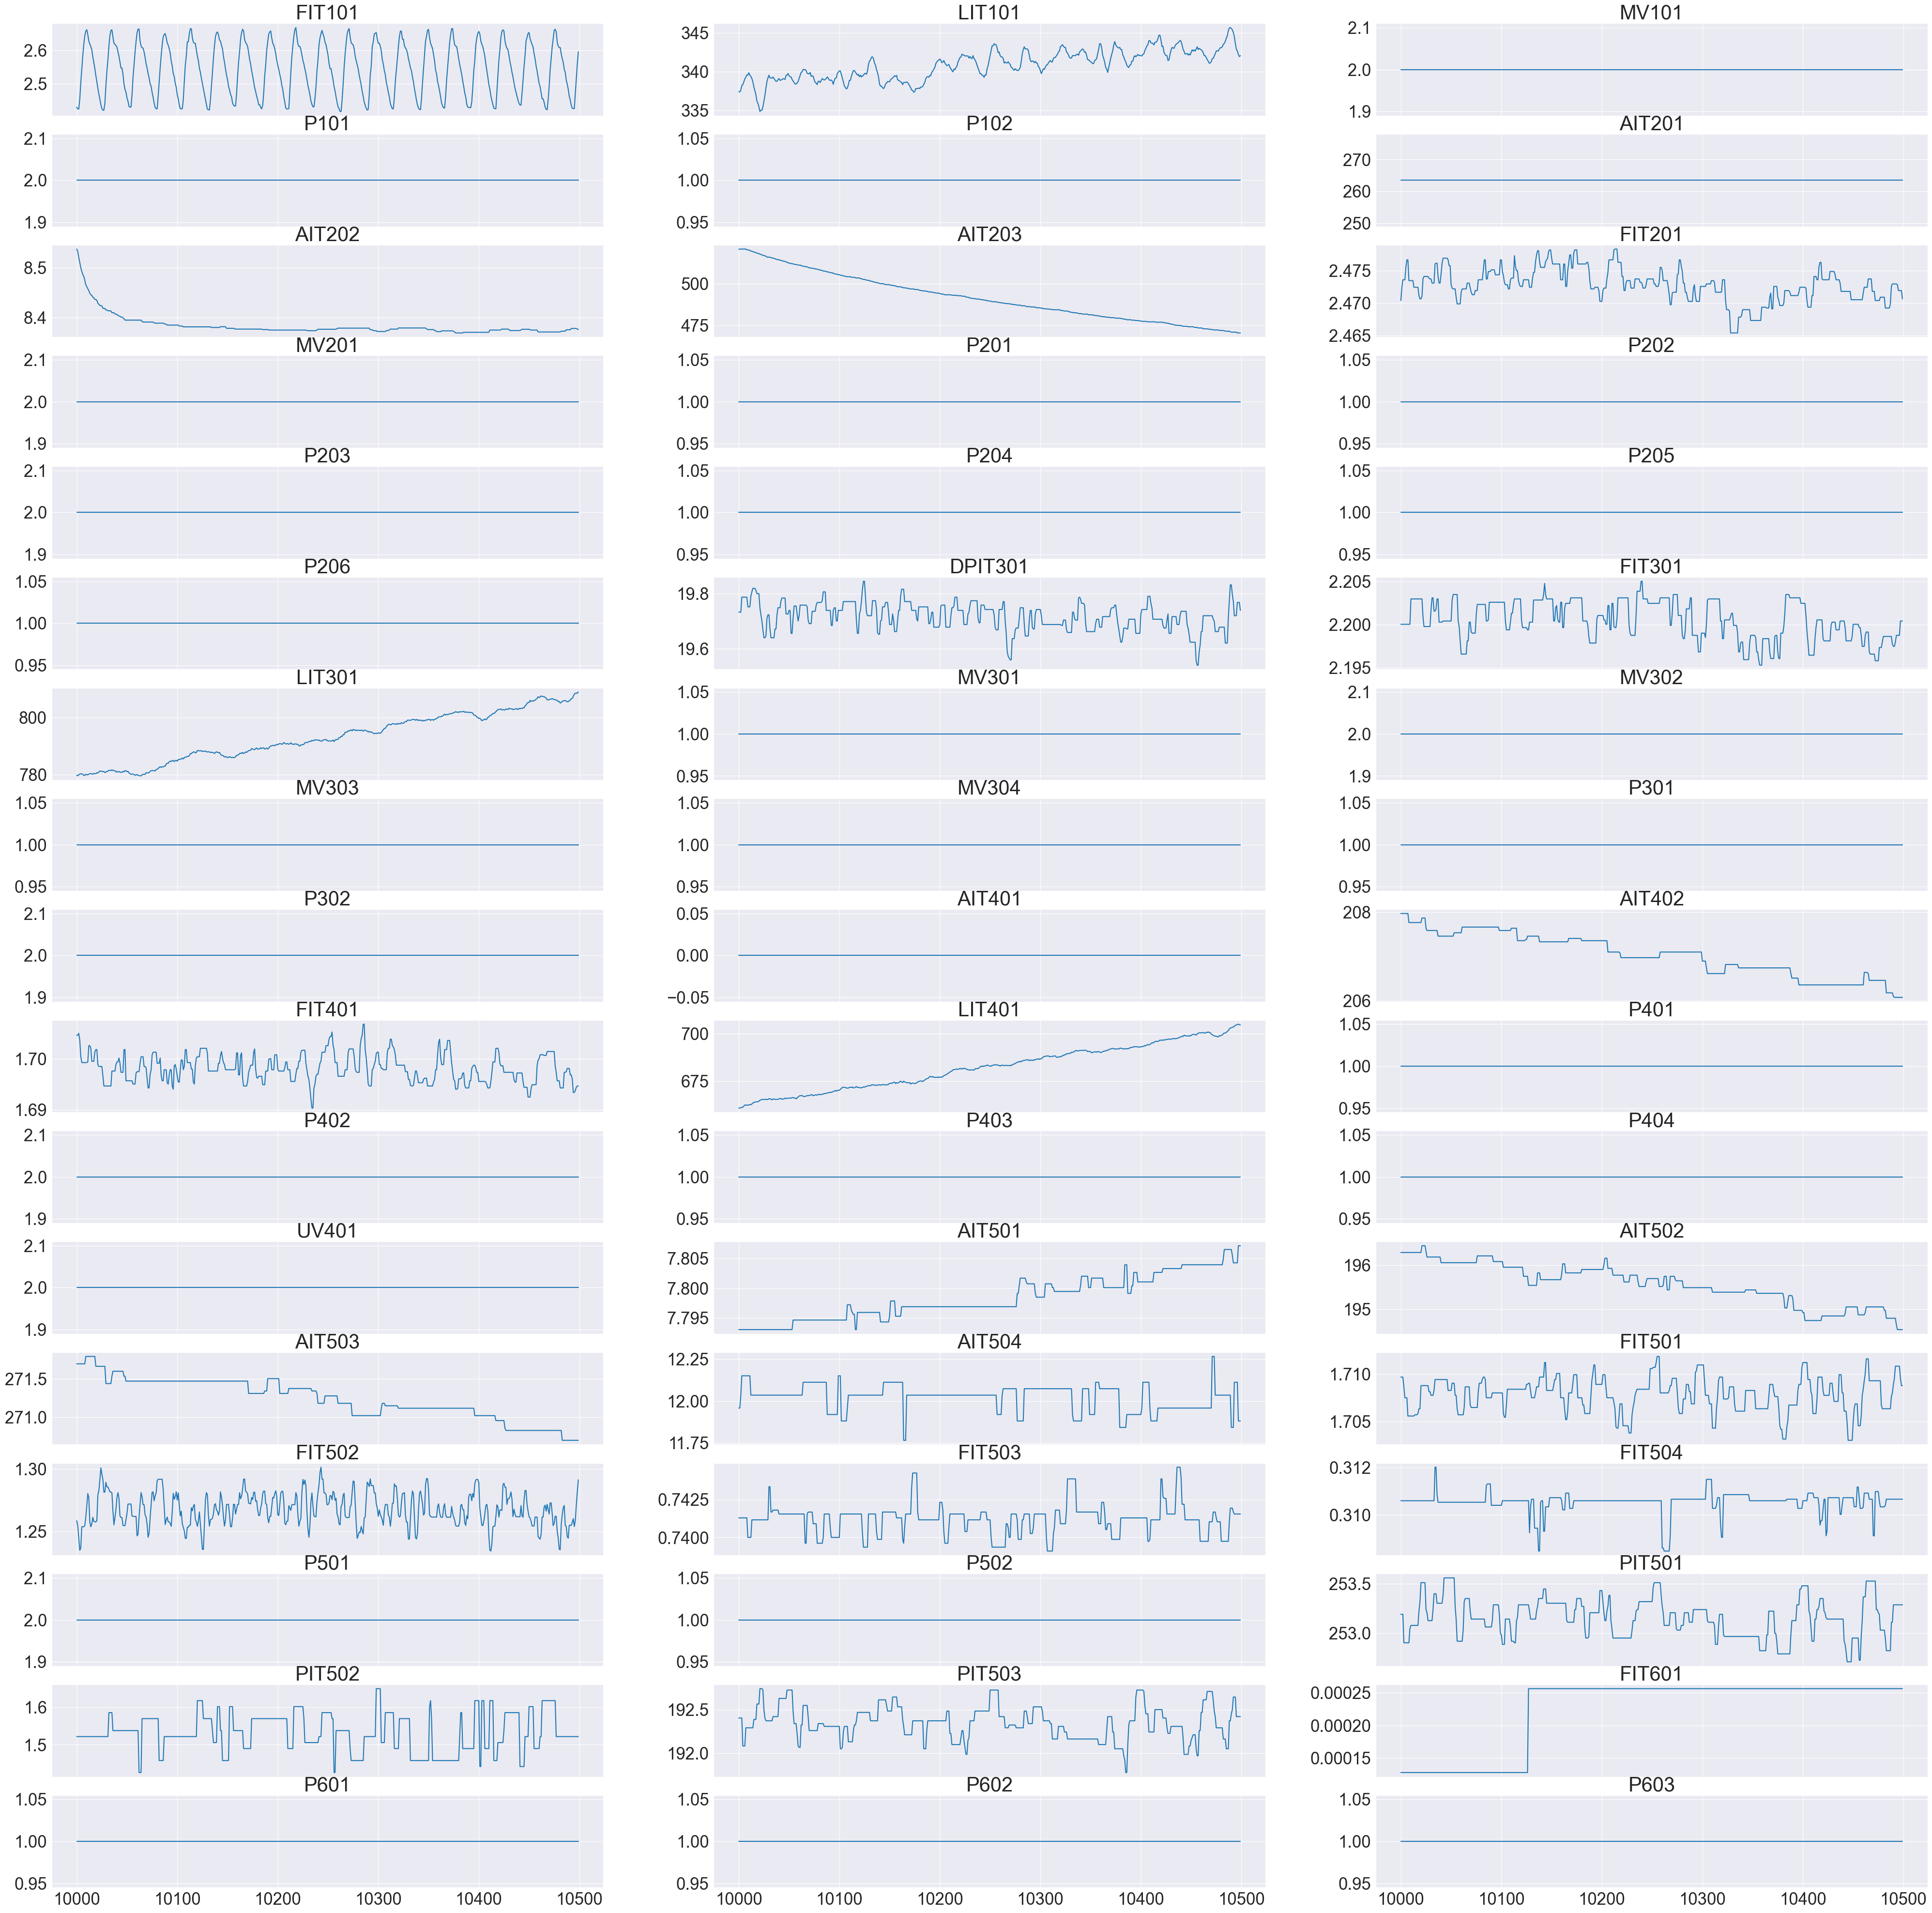

In [58]:
plt.clf()
fig, axes = plt.subplots(17, 3, figsize=(50, 50), sharex=True)
# Change the font size
plt.rcParams.update({'font.size': 25})
for i, ax in enumerate(axes.flatten()):
    ax.plot(train_data_df.iloc[10000:10500, i + 1])
    ax.set_title(train_data_df.columns[i + 1])
    # Adjust the tick sizes
    ax.tick_params(axis='both', which='major', labelsize=25)
    ax.tick_params(axis='both', which='minor', labelsize=25)


Splitting the data into two kinds of signals:

In [59]:
SENSOR_ATTRIBUTES = [
    'FIT101', 'LIT101', 'AIT201', 'AIT202', 'AIT203',
    'FIT201', 'DPIT301', 'FIT301', 'LIT301', 'AIT401',
    'AIT402', 'FIT401', 'LIT401', 'AIT501', 'AIT502',
    'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503',
    'FIT504', 'PIT501', 'PIT502', 'PIT503', 'FIT601'
]

ACTUATOR_ATTRIBUTES = [
    'MV101', 'P101', 'P102', 'MV201', 'P201', 'P202',
    'P203', 'P204', 'P205', 'P206', 'MV301', 'MV302',
    'MV303', 'MV304', 'P301', 'P302', 'P401',
    'P402', 'P403', 'P404', 'UV401', 'P501', 'P502',
    'P601', 'P602', 'P603'
]

Printing out the unique values for the discrete signals and finding signals that only take one value (useless signals)

In [60]:
print("Unique values per column")
useless_attributes = []
for col in pd.concat(
        [train_data_df[ACTUATOR_ATTRIBUTES], val_data_df[ACTUATOR_ATTRIBUTES], test_data_df[ACTUATOR_ATTRIBUTES]],
        axis=0):
    unique_attrs = train_data_df[col].unique()
    if len(unique_attrs) == 1:
        useless_attributes.append(col)
    print(f'{col:5s} : {sorted(unique_attrs)}')
useless_attributes

Unique values per column
MV101 : [0, 1, 2]
P101  : [1, 2]
P102  : [1]
MV201 : [0, 1, 2]
P201  : [1]
P202  : [1]
P203  : [1, 2]
P204  : [1]
P205  : [1, 2]
P206  : [1]
MV301 : [0, 1, 2]
MV302 : [0, 1, 2]
MV303 : [0, 1, 2]
MV304 : [0, 1, 2]
P301  : [1, 2]
P302  : [1, 2]
P401  : [1]
P402  : [1, 2]
P403  : [1]
P404  : [1]
UV401 : [1, 2]
P501  : [1, 2]
P502  : [1]
P601  : [1]
P602  : [1, 2]
P603  : [1]


['P102',
 'P201',
 'P202',
 'P204',
 'P206',
 'P401',
 'P403',
 'P404',
 'P502',
 'P601',
 'P603']

Plotting auto-correlations for the relevant (non-backup) signals

In [61]:
# Get the relevant (non-backup) attributes
all_attributes = []
all_attributes.extend(SENSOR_ATTRIBUTES)
all_attributes.extend(ACTUATOR_ATTRIBUTES)
print(all_attributes)
relevant_attributes = [attr for attr in all_attributes if attr not in useless_attributes]
num_relevant_attributes = len(relevant_attributes)
num_relevant_attributes

['FIT101', 'LIT101', 'AIT201', 'AIT202', 'AIT203', 'FIT201', 'DPIT301', 'FIT301', 'LIT301', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'AIT501', 'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'PIT501', 'PIT502', 'PIT503', 'FIT601', 'MV101', 'P101', 'P102', 'MV201', 'P201', 'P202', 'P203', 'P204', 'P205', 'P206', 'MV301', 'MV302', 'MV303', 'MV304', 'P301', 'P302', 'P401', 'P402', 'P403', 'P404', 'UV401', 'P501', 'P502', 'P601', 'P602', 'P603']


40

Plotting the autocorrelations for the relevant attributes. Normally, the autocorrelation function is plotted for the first 24 hours of the signal. If the computation takes too long, this can be reduced to a smaller time frame by modifying the plotting_time variable.

C:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:691: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]
C:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


<Figure size 640x480 with 0 Axes>

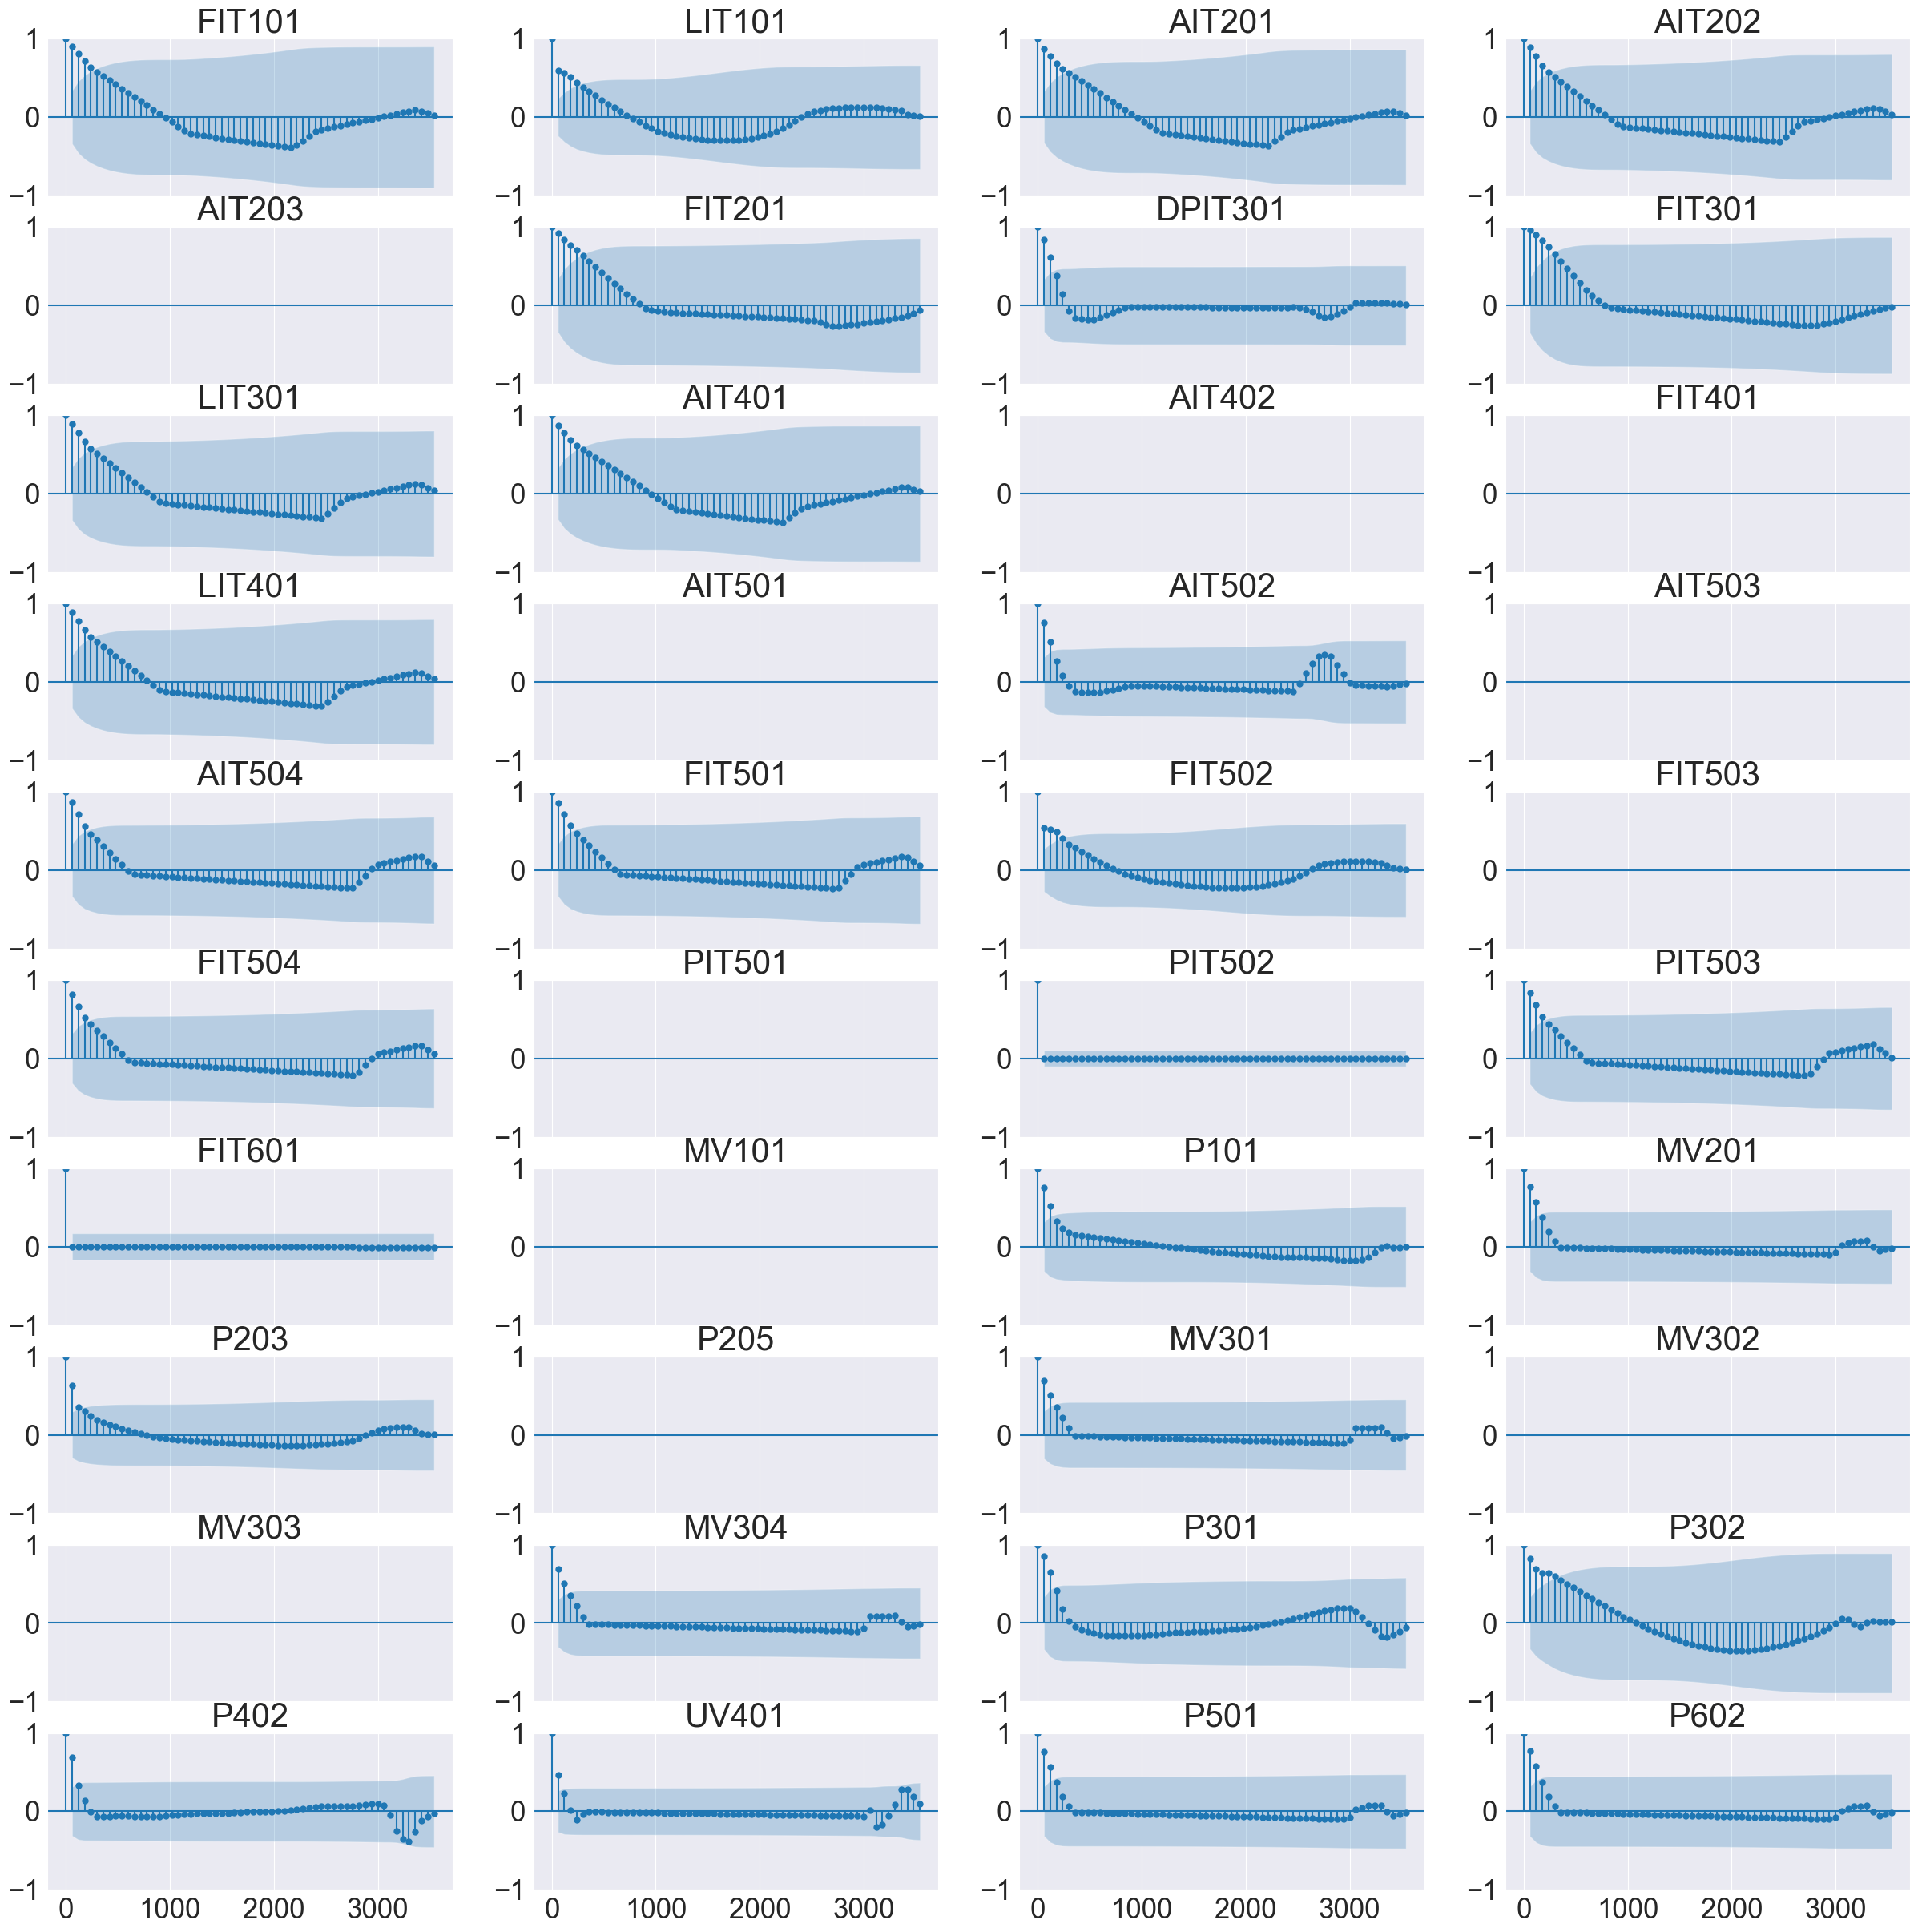

In [64]:
# Plot the autocorrelations for the relevant attributes
plotting_time = 60 * 60
plt.clf()
fig, axes = plt.subplots(10, 4, figsize=(30, 30), sharex=True)
for i, ax in enumerate(axes.flatten()):
    plot_acf(train_data_df.iloc[: plotting_time, i + 1], ax=ax, title=relevant_attributes[i],
             lags=list(range(0, plotting_time, 60)))
plt.show()

#### Plotting sub-system P1 correlations (2nd day)

In [87]:
plotting_time = 60 * 60 * 24

attr_p1 = ["Timestamp", "FIT101", "LIT101", "MV101", "P101"]
system_p1_df = train_data_df[attr_p1].iloc[plotting_time:2 * plotting_time]

<Figure size 640x480 with 0 Axes>

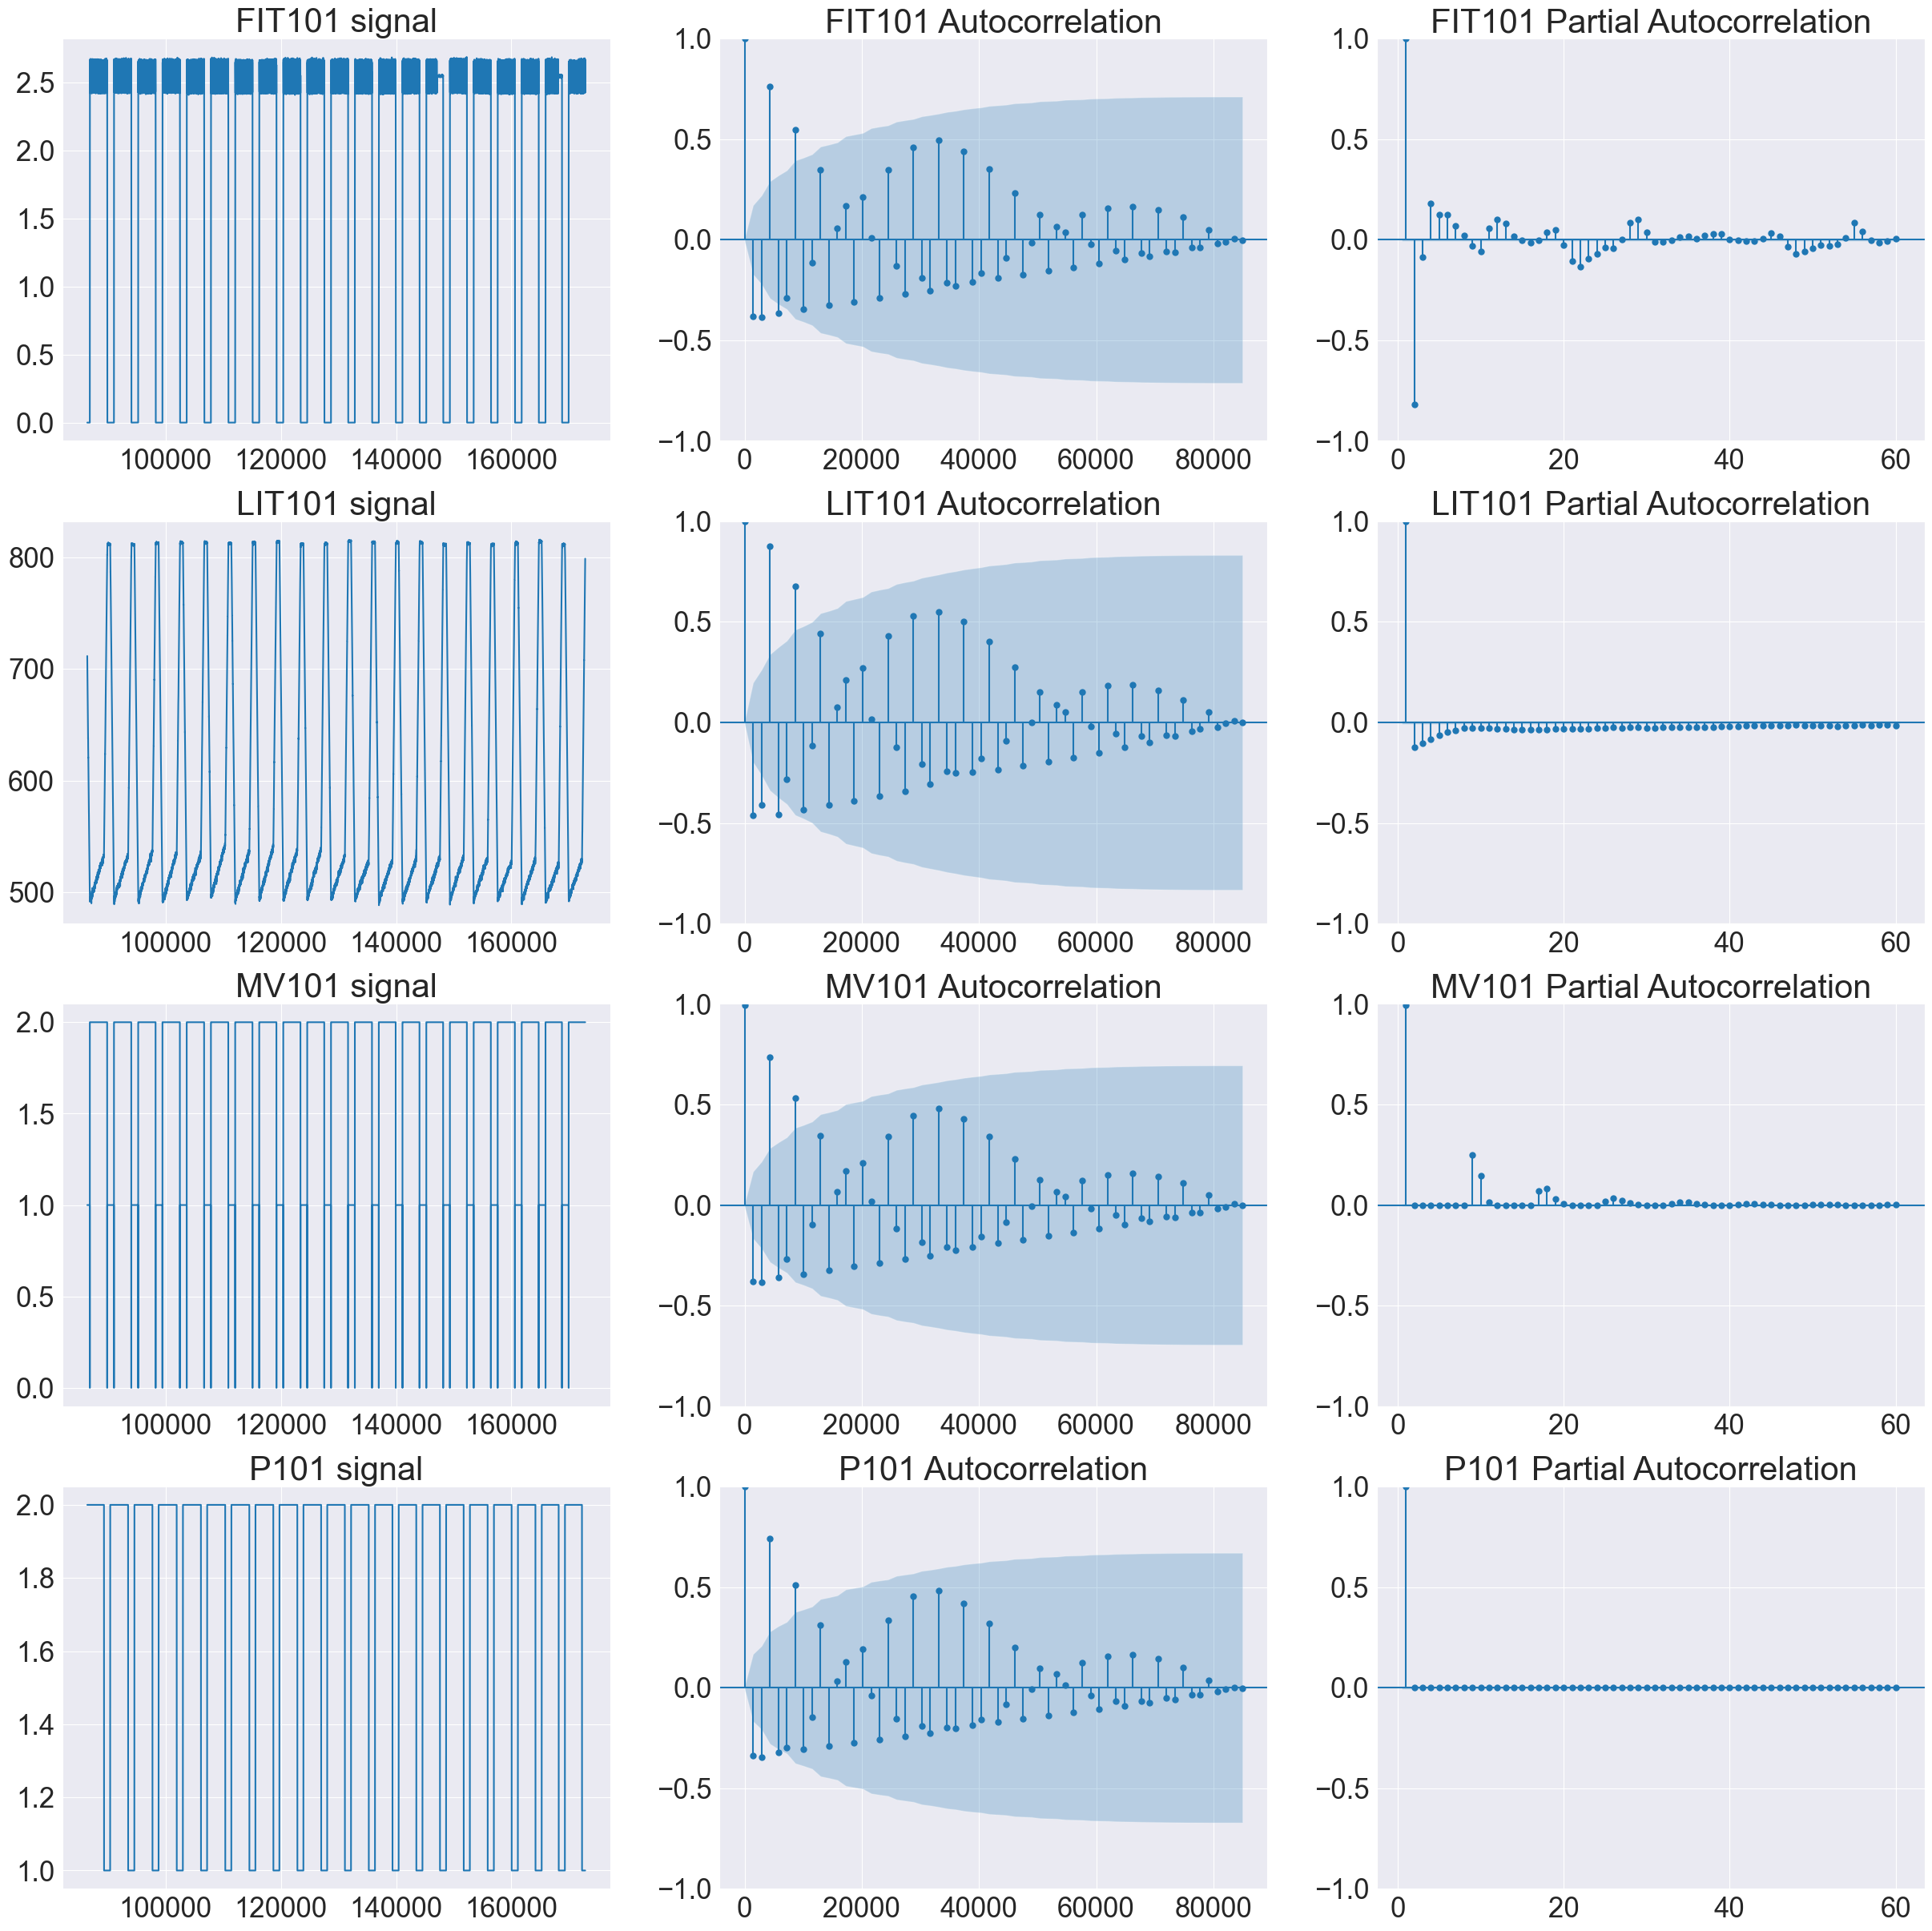

In [88]:
plt.clf()
fig, axes = plt.subplots(4, 3, figsize=(30, 30))
auto_corr_lags = list(range(1, plotting_time, 60*24))
for i, ax in enumerate(axes):
    signal_name = system_p1_df.columns[i + 1]
    curr_signal = system_p1_df.iloc[:, i + 1]
    ax[0].plot(curr_signal)
    ax[0].set_title(f"{signal_name} signal")
    ax[0].tick_params(axis='both', which='major', labelsize=25)
    ax[0].tick_params(axis='both', which='minor', labelsize=25)

    plot_acf(curr_signal, ax=ax[1], title=f"{signal_name} Autocorrelation", lags=auto_corr_lags)
    plot_pacf(curr_signal, ax=ax[2], title=f"{signal_name} Partial Autocorrelation", lags=np.arange(1, len(auto_corr_lags)+1))
plt.show()

In [89]:
cross_corr_dict = {}
for i in range(1, len(attr_p1)):
    for j in range(1, len(attr_p1)):
        if i == j:
            continue
        if f'{attr_p1[i]}_{attr_p1[j]}' in cross_corr_dict or f'{attr_p1[j]}_{attr_p1[i]}' in cross_corr_dict:
            continue
        signal1 = system_p1_df.iloc[:, i]
        signal2 = system_p1_df.iloc[:, j]
        cross_corr = ccf(signal1, signal2)
        cross_corr_dict[f'{attr_p1[i]}_{attr_p1[j]}'] = cross_corr

<Figure size 640x480 with 0 Axes>

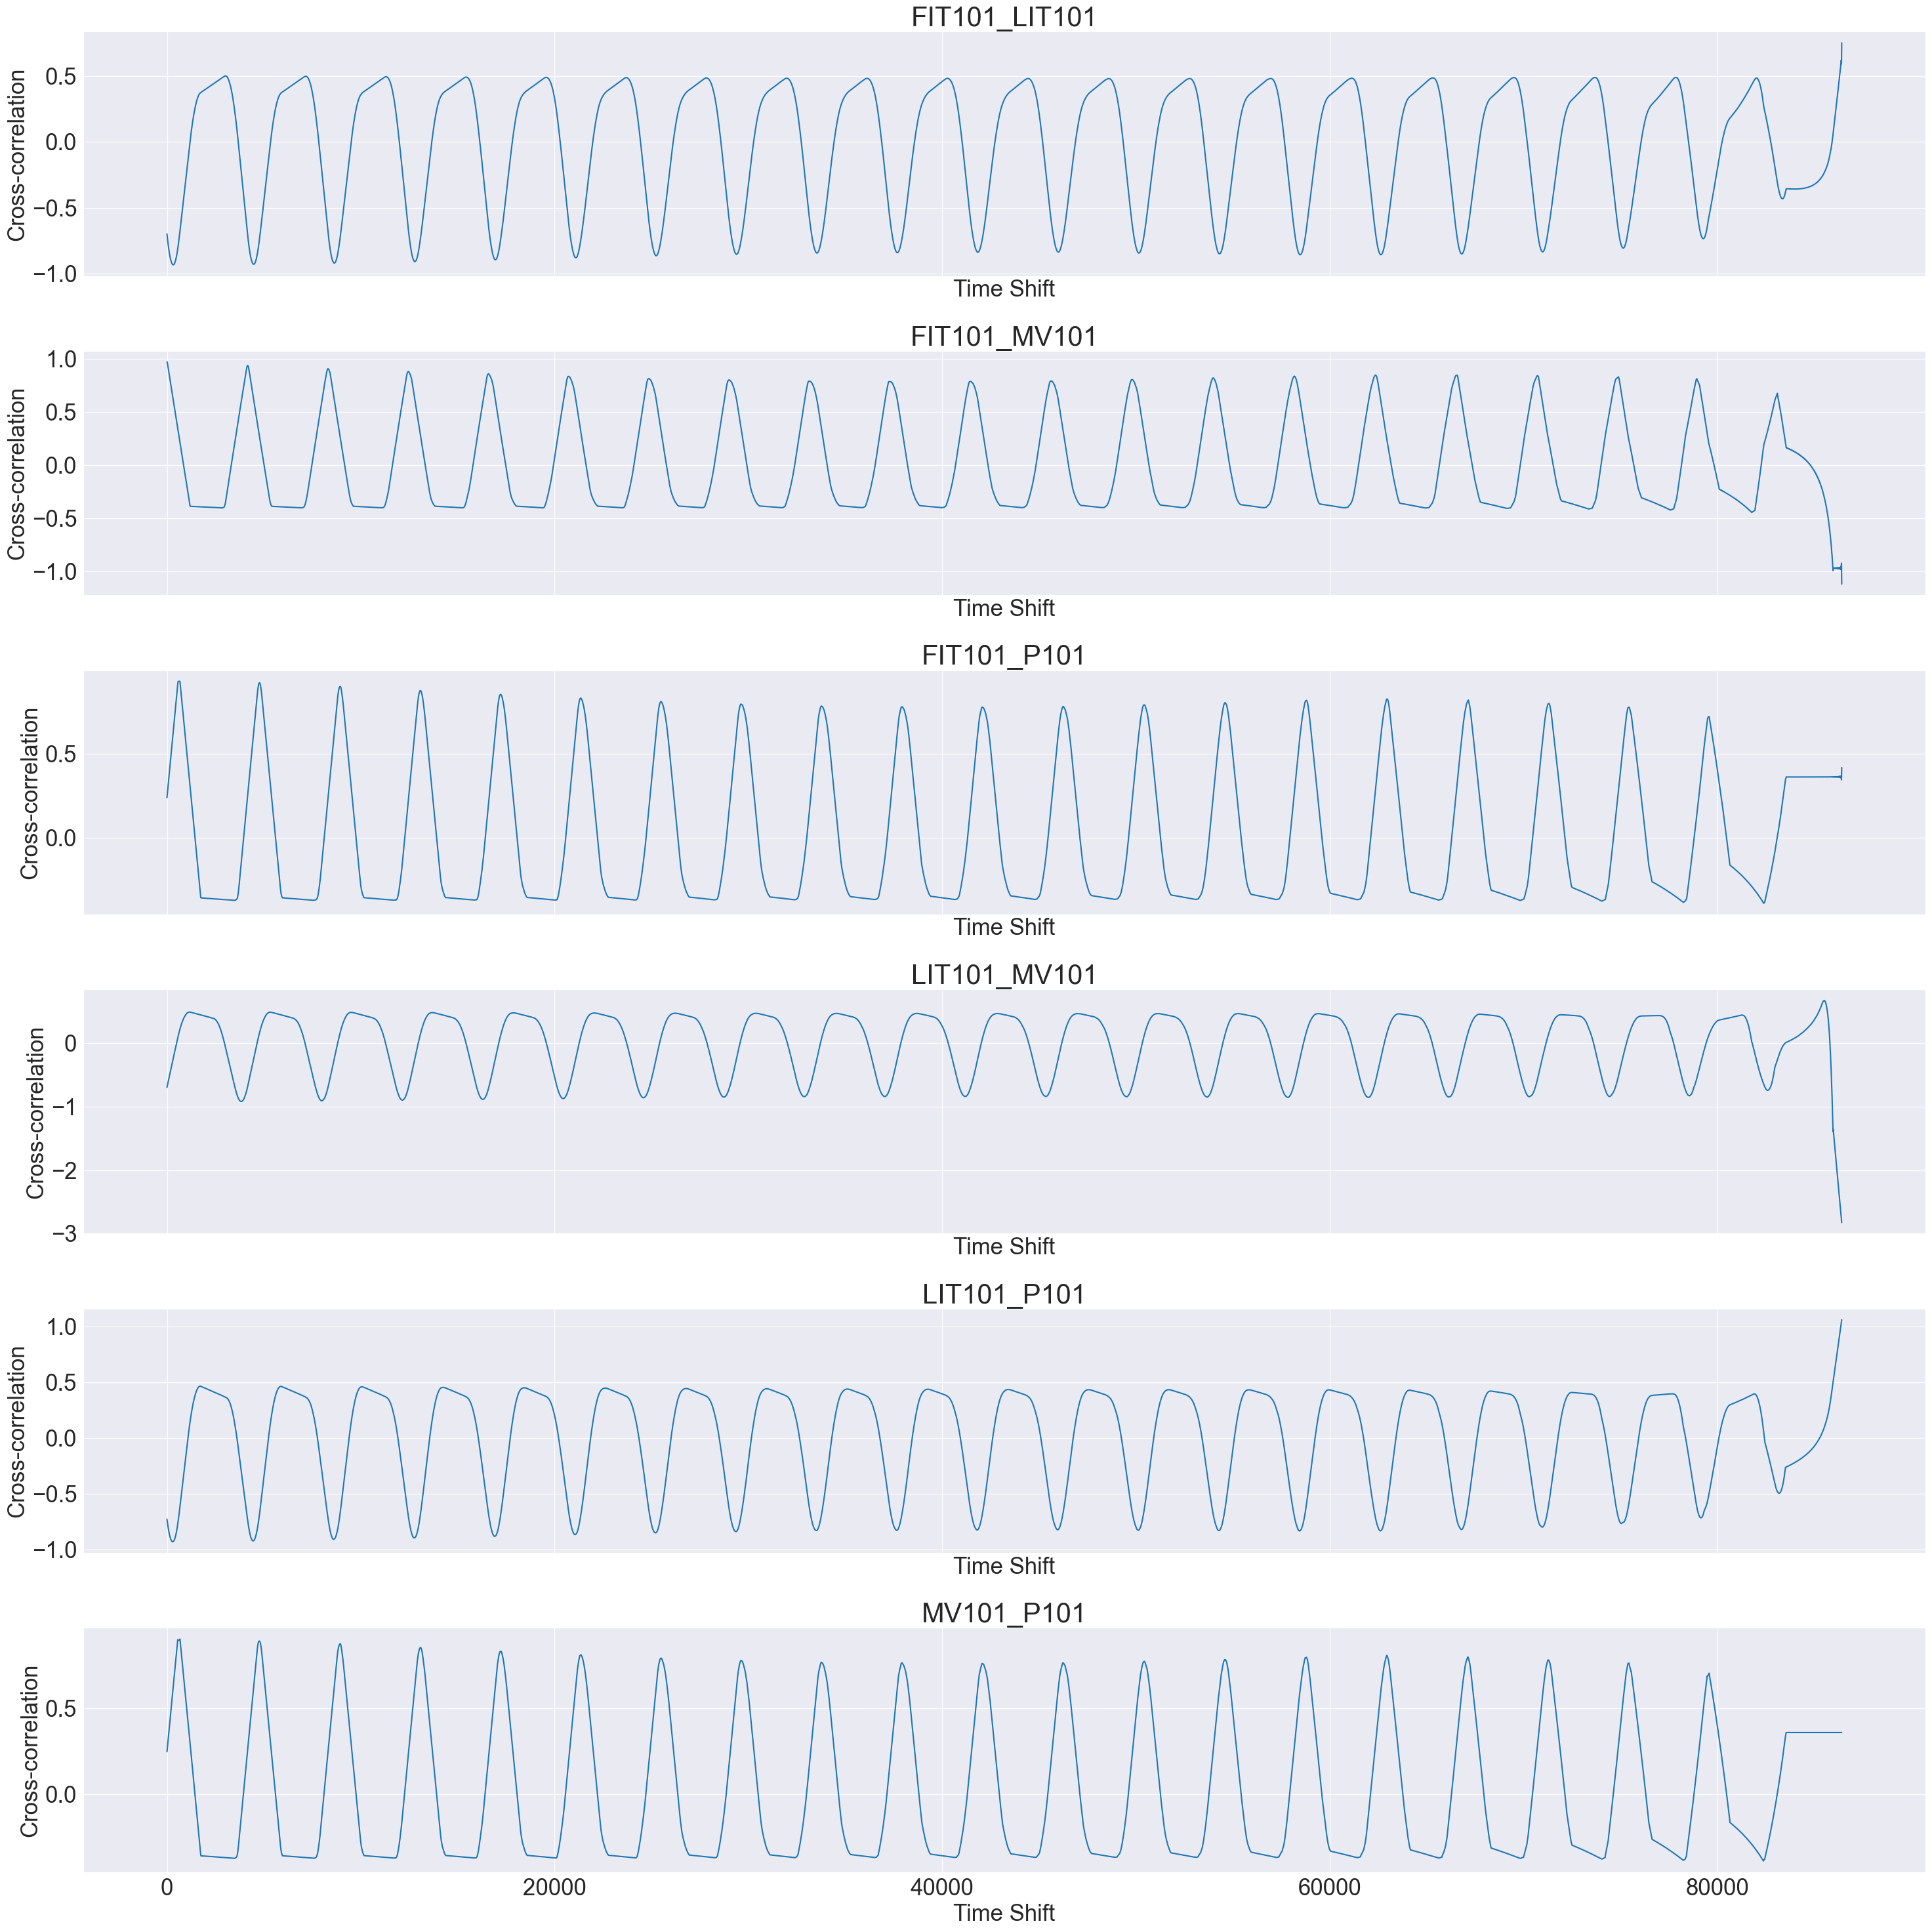

In [90]:
plt.clf()
fig, axes = plt.subplots(6, figsize=(30, 30), sharex=True)
cross_res_items = list(cross_corr_dict.keys())
for i, ax in enumerate(axes.flatten()):
    cross_corr = cross_corr_dict[cross_res_items[i]]
    time_axis = np.arange(plotting_time)
    ax.plot(time_axis, cross_corr)
    ax.set_xlabel('Time Shift')
    ax.set_ylabel('Cross-correlation')
    ax.set_title(cross_res_items[i])
fig.tight_layout()
plt.show()

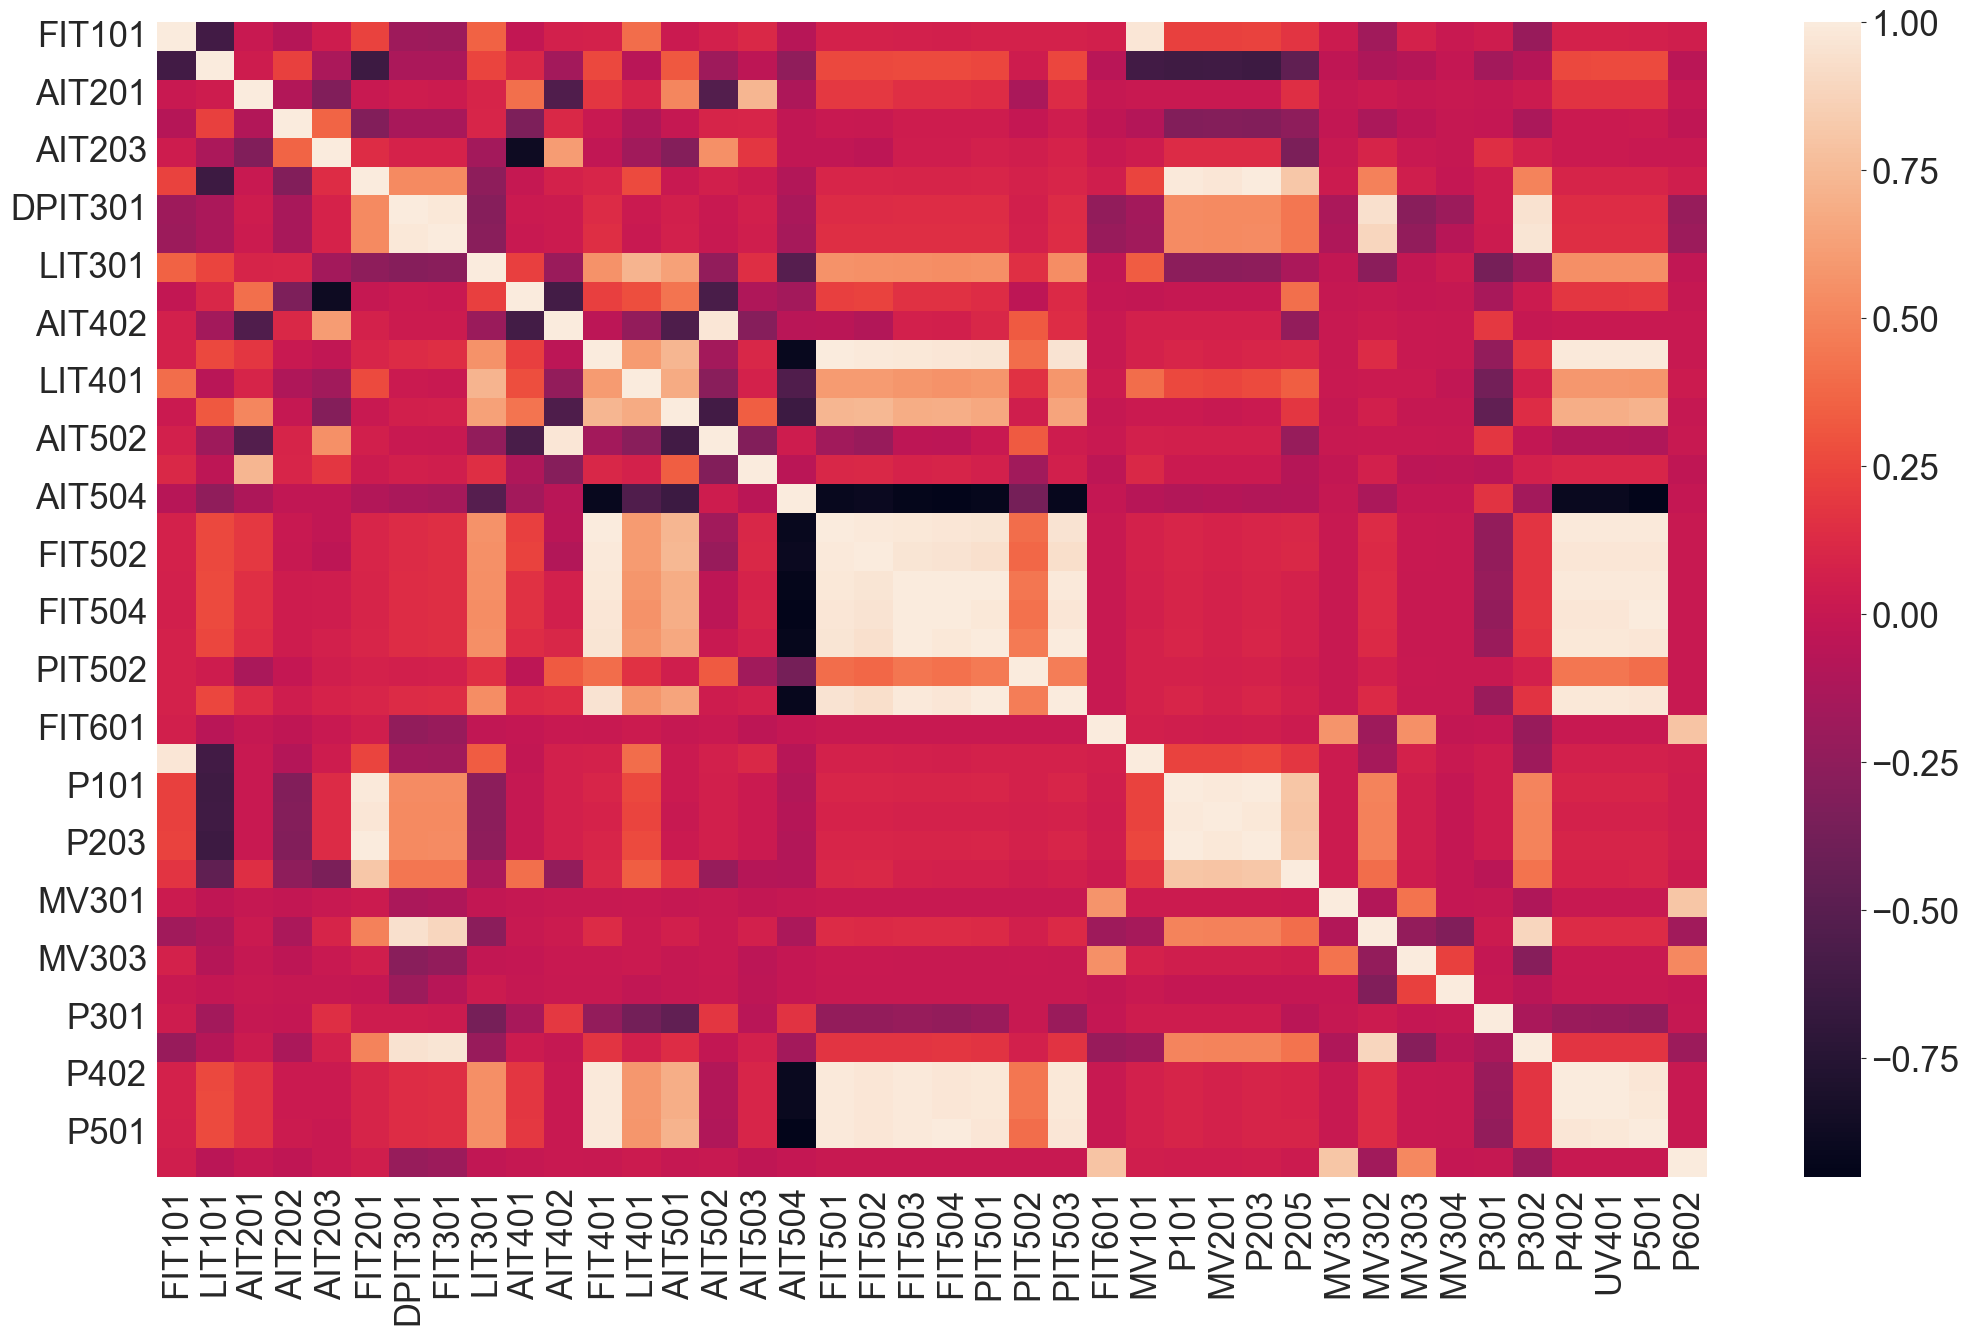

In [91]:
plt.figure(figsize=(25, 15))
sns.heatmap(train_data_df[relevant_attributes].corr())
plt.show()

### 1b. Answers to the three questions

**1.**

The data presented is a collection of simulated data points from a Secure Water Treatment (SWaT) testbed for 11-days experiment (7 days normal operation and 4 days with cyber and physical attacks).

The data contains 51 signals of which there are 25 sensor values (represented as floating points) that take measurements and 26 actuator values (represented as integers) which represent states of the actuators which is defined within a limited number of integers.

**2.**

It is evident from both the plotted signals and auto-correlation plots that part of the signals are correlated. While it was infeasible to compute the complete autocorrelation function for the whole dataset, we looked at a subset of time frames during which the signals could be correlated.

**3.**

Some signals are cyclic in nature. The cycles also differ in scale. For example, in the micro-scale some cyclic behavior can be observed for the signal FIT101. For the larger scale, a cyclic behavior can be observed for signals such as LIT401 and MV201. However, the cycles do not seem to be fully regular and there exists some noise in the data. What's also interesting is that the cyclic behavior is more evident after a few hours of the signals.The cyclic behavior could also be observed in the auto-correlation plots. For instance, there are large spikes in the autocorrelation in PIT501 and PIT502 every 2000 seconds which may mean that this is the period of the signal.

## 2. LOF task – 1/2 A4 – Individual

### 2a. Plot LOF scores

### 2b. Analysis and answers to the questions

## 3. PCA task – 1/2 A4 – Individual

### 3a. Plot PCA residuals

## Student 2
### Name : Michał Okoń
### ID : 5056640

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import ccf

### Data Loading

#### Loading into pandas dataframe

In [3]:
train_data_path = os.path.join(os.getcwd(), "data", "train_data.csv")
val_data_path = os.path.join(os.getcwd(), "data", "val_data.csv")
test_data_path = os.path.join(os.getcwd(), "data", "test_data.csv")

train_data_df = pd.read_csv(train_data_path)
train_data_df.set_index('Id', inplace=True)
val_data_df = pd.read_csv(val_data_path)
val_data_df.set_index('Id', inplace=True)
test_data_df = pd.read_csv(test_data_path)
test_data_df.set_index('Id', inplace=True)

In [4]:
# Excluding the time frame and the target variable and backup signals
relevant_signals = ['FIT101', 'LIT101', 'AIT201', 'AIT202', 'AIT203', 'FIT201', 'DPIT301', 'FIT301', 'LIT301', 'AIT401',
                    'AIT402', 'FIT401', 'LIT401', 'AIT501', 'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503',
                    'FIT504', 'PIT501', 'PIT502', 'PIT503', 'FIT601', 'MV101', 'P101', 'MV201', 'P203', 'P205', 'MV301',
                    'MV302', 'MV303', 'MV304', 'P301', 'P302', 'P402', 'UV401', 'P501', 'P602']
relevant_train_data_df = train_data_df[relevant_signals]
relevant_train_data_df

FIT101    LIT101    AIT201    AIT202    AIT203    FIT201   DPIT301  \
Id                                                                             
0       2.470294  261.5804  244.3284  8.190080  306.1010  2.471278  20.79839   
1       2.457163  261.1879  244.3284  8.190080  306.1010  2.468587  20.79839   
2       2.439548  260.9131  244.3284  8.190080  306.1010  2.467305  20.84320   
3       2.428338  260.2850  244.3284  8.190080  306.1010  2.466536  20.84320   
4       2.424815  259.8925  244.4245  8.190080  306.1010  2.466536  20.84320   
...          ...       ...       ...       ...       ...       ...       ...   
496795  2.460366  523.0430  262.0161  8.396437  328.5055  2.442316  19.74838   
496796  2.448836  522.9645  262.0161  8.396437  328.5055  2.442316  19.74838   
496797  2.434744  522.8860  262.0161  8.396437  328.6337  2.444879  19.74838   
496798  2.428338  522.9252  262.0161  8.396437  328.6337  2.445391  19.74838   
496799  2.427057  522.8467  262.0161  8.396437  328.6337  2.445391  19.74838   

          FIT301    LIT301   AIT401  ...  MV301  MV302  MV303  MV304  P301  \
Id                                   ...                                     
0       2.235275  327.4401    0.000  ...      1      2      1      1     2   
1       2.234507  327.4401    0.000  ...      1      2      1      1     2   
2       2.233354  327.4401    0.000  ...      1      2      1      1     2   
3       2.233354  327.2799    0.000  ...      1      2      1      1     2   
4       2.233354  327.1597    0.000  ...      1      2      1      1     2   
...          ...       ...      ...  ...    ...    ...    ...    ...   ...   
496795  2.212087  955.8046  148.808  ...      1      2      1      1     1   
496796  2.210037  955.8847  148.808  ...      1      2      1      1     1   
496797  2.207731  955.9648  148.808  ...      1      2      1      1     1   
496798  2.206835  956.2051  148.808  ...      1      2      1      1     1   
496799  2.206835  956.1651  148.808  ...      1      2      1      1     1   

        P302  P402  UV401  P501  P602  
Id                                     
0          1     1      1     1     1  
1          1     1      1     1     1  
2          1     1      1     1     1  
3          1     1      1     1     1  
4          1     1      1     1     1  
...      ...   ...    ...   ...   ...  
496795     2     2      2     2     1  
496796     2     2      2     2     1  
496797     2     2      2     2     1  
496798     2     2      2     2     1  
496799     2     2      2     2     1  

[496800 rows x 40 columns]

In [5]:
test_data_df

Timestamp    FIT101    LIT101  MV101  P101  P102  \
Id                                                                       
224959   31/12/2015 12:29:19 AM  2.612177  517.6261      2     2     1   
224960   31/12/2015 12:29:20 AM  2.612177  517.7831      2     2     1   
224961   31/12/2015 12:29:21 AM  2.594562  518.2149      2     2     1   
224962   31/12/2015 12:29:22 AM  2.577907  518.7645      2     2     1   
224963   31/12/2015 12:29:23 AM  2.562854  519.1177      2     2     1   
...                         ...       ...       ...    ...   ...   ...   
449914      2/1/2016 2:59:55 PM  2.559972  519.5495      2     2     1   
449915      2/1/2016 2:59:56 PM  2.549082  520.4131      2     2     1   
449916      2/1/2016 2:59:57 PM  2.531467  520.6878      2     2     1   
449917      2/1/2016 2:59:58 PM  2.521218  520.7271      2     2     1   
449918      2/1/2016 2:59:59 PM  2.501681  521.1196      2     2     1   

          AIT201    AIT202    AIT203    FIT201  ...    FIT504  P501  P502  \
Id                                              ...                         
224959  192.2263  8.530376  324.2758  2.443597  ...  0.306825     2     1   
224960  192.2263  8.531017  324.2758  2.443597  ...  0.306441     2     1   
224961  192.2263  8.531017  324.2758  2.443597  ...  0.306441     2     1   
224962  192.2263  8.531017  324.2758  2.442060  ...  0.306441     2     1   
224963  192.2263  8.531017  324.2758  2.441419  ...  0.306441     2     1   
...          ...       ...       ...       ...  ...       ...   ...   ...   
449914  168.0979  8.638683  301.9226  2.459488  ...  0.306569     2     1   
449915  168.0979  8.638683  301.9226  2.459488  ...  0.306569     2     1   
449916  168.0979  8.638683  301.9226  2.460129  ...  0.306569     2     1   
449917  168.0979  8.638683  301.9226  2.460129  ...  0.307978     2     1   
449918  168.0979  8.638683  301.9226  2.458206  ...  0.308298     2     1   

          PIT501    PIT502    PIT503  FIT601  P601  P602  P603  
Id                                                              
224959  250.0000  0.816967  188.4613     0.0     1     1     1  
224960  250.0000  0.816967  188.4613     0.0     1     1     1  
224961  249.9840  0.816967  188.4613     0.0     1     1     1  
224962  249.7597  0.816967  188.4613     0.0     1     1     1  
224963  249.7597  0.816967  188.4613     0.0     1     1     1  
...          ...       ...       ...     ...   ...   ...   ...  
449914  251.1535  0.865024  189.0220     0.0     1     1     1  
449915  251.0734  0.865024  188.9259     0.0     1     1     1  
449916  251.0734  0.865024  188.9259     0.0     1     1     1  
449917  251.0734  0.865024  188.9259     0.0     1     1     1  
449918  251.0734  0.865024  188.9259     0.0     1     1     1  

[224960 rows x 52 columns]

## 3. PCA task – 1/2 A4 – Individual

### 3a. Plot PCA residuals

Main functions used to perform the PCA and plot the residuals.

In [6]:
def get_pca_residuals(df, components=None):
    total_residuals = []
    if components is None:
        component_range = range(1, len(df.columns))
    else:
        component_range = components
    for n_components in component_range:
        pca = PCA(n_components=n_components)
        pca.fit(df)
        # Calculate residuals
        residuals = calculate_residuals(df, pca)
        total_residuals.append(residuals)
    return total_residuals


def plot_pca_residuals(residuals, components, start_index=0, true_labels=None, predicted_labels=None):
    print(residuals)
    print(true_labels)
    plt.clf()
    x = np.arange(start_index, len(residuals[0]))
    for i, residual in enumerate(residuals):
        plt.plot(x, residual[start_index:], label=f'{components[i]}')
        if true_labels is not None:
            plt.scatter(true_labels, residual[true_labels], label="True anomalies", color="green", s=20)
        if predicted_labels is not None:
            plt.scatter(predicted_labels, residual[predicted_labels], label="Predicted anomalies", color="blue", s=10)
    plt.legend()
    plt.title('PCA Residuals for different number of components')
    plt.show()


def calculate_residuals(df, pca):
    return np.sum(np.abs(df - pca.inverse_transform(pca.transform(df))), axis=1)

Perform the residual analysis.

In [7]:
components = np.arange(1, len(relevant_train_data_df.columns))

In [8]:
partial_components1 = [1, 2, 5]
partial_residuals1 = get_pca_residuals(relevant_train_data_df, components=partial_components1)

In [9]:
partial_components2 = [10, 15, 20]
partial_residuals2 = get_pca_residuals(relevant_train_data_df, components=partial_components2)

In [10]:
partial_components3 = [25, 30, 35]
partial_residuals3 = get_pca_residuals(relevant_train_data_df, components=partial_components3)

[Id
0         917.850006
1         917.549624
2         917.456992
3         916.830748
4         916.143625
             ...    
496795    239.042057
496796    239.653358
496797    239.808106
496798    239.750478
496799    239.753180
Length: 496800, dtype: float64, Id
0         734.378942
1         734.462915
2         734.609380
3         734.518173
4         734.184842
             ...    
496795     95.552191
496796     95.856484
496797     95.637299
496798     96.171168
496799     95.877102
Length: 496800, dtype: float64, Id
0         259.450552
1         259.370611
2         259.352427
3         259.261923
4         259.126240
             ...    
496795     40.628534
496796     40.549251
496797     40.628583
496798     40.754636
496799     40.735714
Length: 496800, dtype: float64]
None


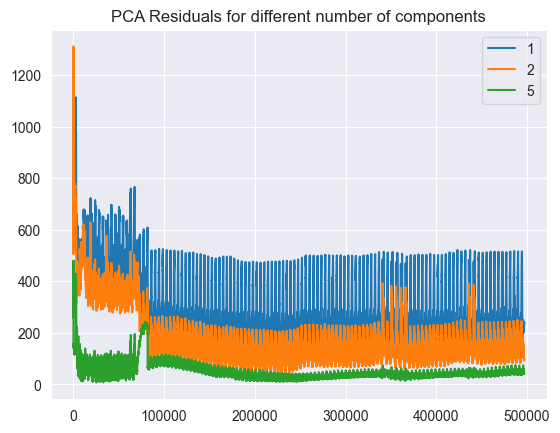

[Id
0         29.049197
1         28.999717
2         28.985669
3         28.958254
4         28.926857
            ...    
496795     4.583425
496796     4.498623
496797     4.500494
496798     4.222863
496799     4.143299
Length: 496800, dtype: float64, Id
0         10.928172
1         10.930094
2         10.937164
3         10.939351
4         10.933046
            ...    
496795     0.958113
496796     1.141252
496797     1.160993
496798     1.025712
496799     0.949351
Length: 496800, dtype: float64, Id
0         2.660547
1         2.666392
2         2.679768
3         2.685381
4         2.685986
            ...   
496795    0.228792
496796    0.327392
496797    0.346145
496798    0.336813
496799    0.311551
Length: 496800, dtype: float64]
None


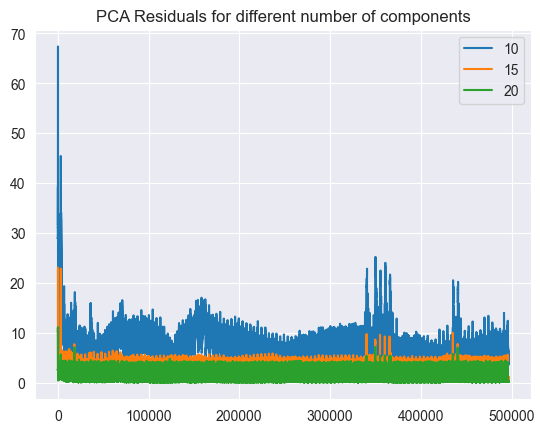

[Id
0         2.538500
1         2.538896
2         2.533555
3         2.534403
4         2.534000
            ...   
496795    0.141214
496796    0.206557
496797    0.219920
496798    0.202977
496799    0.184758
Length: 496800, dtype: float64, Id
0         0.858452
1         0.860000
2         0.861314
3         0.861863
4         0.862875
            ...   
496795    0.073338
496796    0.167333
496797    0.179039
496798    0.169011
496799    0.148650
Length: 496800, dtype: float64, Id
0         0.166472
1         0.166458
2         0.166489
3         0.166486
4         0.166454
            ...   
496795    0.012541
496796    0.003801
496797    0.005352
496798    0.004735
496799    0.005523
Length: 496800, dtype: float64]
None


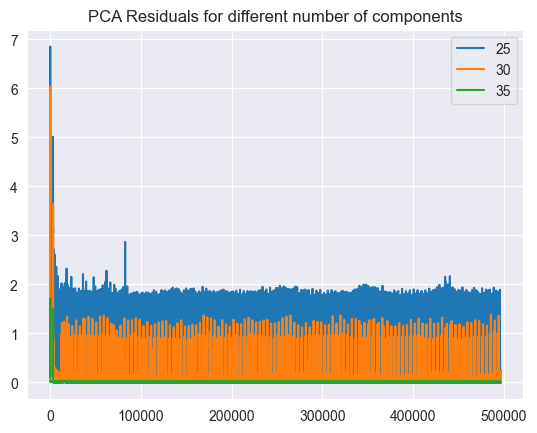

In [11]:
plot_pca_residuals(partial_residuals1, partial_components1, start_index=0)
plot_pca_residuals(partial_residuals2, partial_components2, start_index=0)
plot_pca_residuals(partial_residuals3, partial_components3, start_index=0)

In [12]:
# plot_pca_residuals(residuals, start_index=50000)

25 components seem to be the most suitable choice due to the fact that there are almost no anomalies taking place after the initial time steps - the signal is relatively stable. Analyzing the residuals in the train set.

[Id
0         2.538500
1         2.538896
2         2.533555
3         2.534403
4         2.534000
            ...   
496795    0.141214
496796    0.206557
496797    0.219920
496798    0.202977
496799    0.184758
Length: 496800, dtype: float64]
None


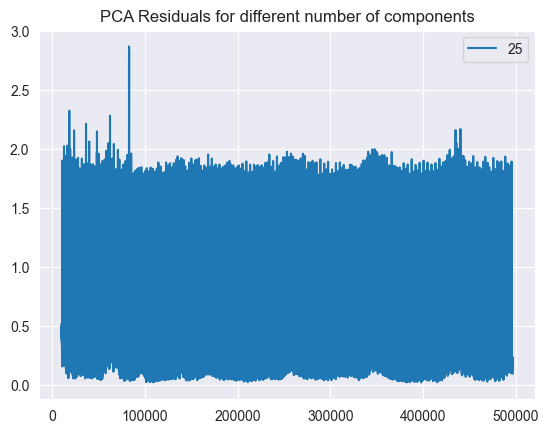

In [13]:
final_components = 25  # 25 good
start_index = 10000
final_pca = PCA(n_components=final_components)
final_pca.fit(relevant_train_data_df)
train_data_pca = final_pca.transform(relevant_train_data_df)
# Calculate residuals
residuals = calculate_residuals(relevant_train_data_df, final_pca)
plot_pca_residuals([residuals], components=[final_components], start_index=start_index)

Plotting residuals from the test set. From the values below, it can be noted that the threshold between 4 and 5 is a good choice as it captures just enough outliers in the data.

[Id
224959    2.438580
224960    2.439346
224961    2.424334
224962    2.380146
224963    2.375354
            ...   
449914    2.891990
449915    2.916629
449916    2.926606
449917    2.938391
449918    2.933320
Length: 224960, dtype: float64]
None


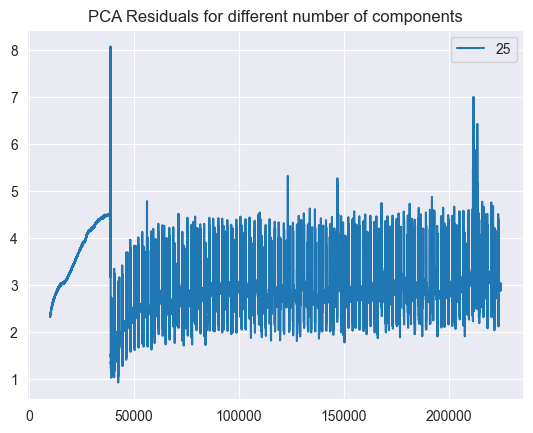

In [14]:
relevant_test_data_df = test_data_df[relevant_signals]

test_data_pca = final_pca.transform(relevant_test_data_df)
# Calculate residuals
residuals = calculate_residuals(relevant_test_data_df, final_pca)
plot_pca_residuals([residuals], components=[final_components], start_index=start_index)

[Id
0         0.184758
1         0.146763
2         0.145627
3         0.176135
4         0.202569
            ...   
224954    2.338033
224955    2.339943
224956    2.355958
224957    2.423998
224958    2.423238
Length: 224959, dtype: float64]
[  1754   1755   1756 ... 199738 199739 199740]


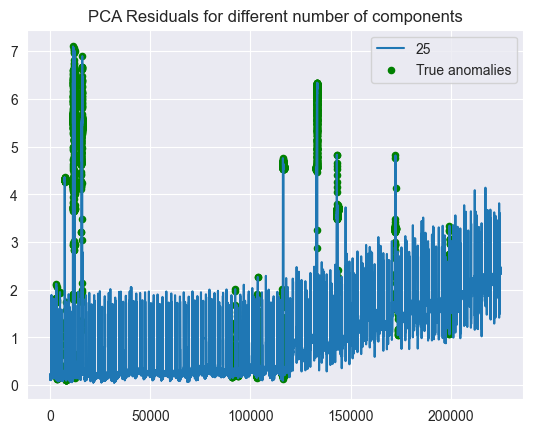

In [15]:
# Plotting residuals from the validation dataset and marking anomalies. As can be seen, some anomalies are properly detected. This is used to verify the submission for kaggle.

relevant_validation_data_df = val_data_df[relevant_signals]
validation_data_pca = final_pca.transform(relevant_validation_data_df)
# Calculate residuals
validation_residuals = calculate_residuals(relevant_validation_data_df, final_pca)

# Get indices of anomalies
anomaly_indices = np.where((val_data_df['Label'].to_numpy() == 1))[0]
plot_pca_residuals([validation_residuals], components=[final_components], start_index=0, true_labels=anomaly_indices)

In [16]:
# Defining the allowed range for each of the signal which is set to be (1.5 * smallest_signal_residual, 1.5 * largest_signal_residual) to provide some safety margin. If the residual of a signal is out of this range, then the signal is considered an anomaly.

def calculate_thresholds(residuals, range_multiplier=1.5):
    return residuals.max() * range_multiplier


start_signal = 10000
trimmed_train_data_df = relevant_train_data_df.iloc[start_signal:, :]
train_residuals = calculate_residuals(trimmed_train_data_df, final_pca)
threshold = calculate_thresholds(train_residuals, range_multiplier=1.5)
print(threshold)

4.301609497302637


In [17]:
print(validation_residuals)

Id
0         0.184758
1         0.146763
2         0.145627
3         0.176135
4         0.202569
            ...   
224954    2.338033
224955    2.339943
224956    2.355958
224957    2.423998
224958    2.423238
Length: 224959, dtype: float64


In [18]:
def find_anomalies_in_residuals(residuals, threshold):
    """
    Returns the set containing indices of anomalies in the residuals.
    """
    anomalies_indices = set()
    # Return indices where the residual is out of the allowed range using numpy
    for i, residual in enumerate(residuals):
        if residual > threshold:
            anomalies_indices.add(i)
    return anomalies_indices


predicted_anomalies = list(find_anomalies_in_residuals(validation_residuals, threshold))


[Id
0         0.184758
1         0.146763
2         0.145627
3         0.176135
4         0.202569
            ...   
224954    2.338033
224955    2.339943
224956    2.355958
224957    2.423998
224958    2.423238
Length: 224959, dtype: float64]
[  1754   1755   1756 ... 199738 199739 199740]


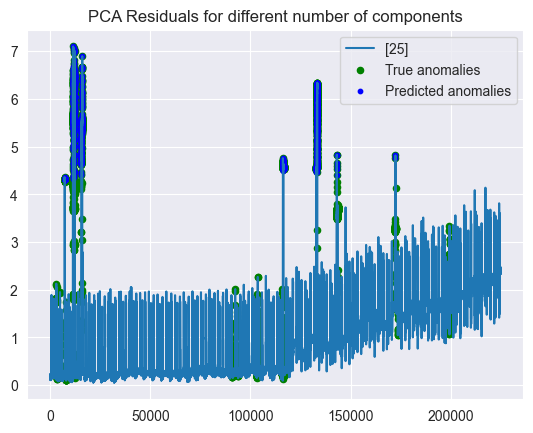

In [19]:
plot_pca_residuals([validation_residuals], components=[[25]], start_index=0, true_labels=anomaly_indices,
                   predicted_labels=predicted_anomalies)

Calculate metrics for the PCA model.

In [70]:
# Calculate the number of true positives, false positives, true negatives and false negatives
def calculate_statistics(predicted_anomalies, true_anomalies):
    true_positives = len(set(predicted_anomalies).intersection(set(true_anomalies)))
    false_positives = len(set(predicted_anomalies).difference(set(true_anomalies)))
    true_negatives = len(
        set(np.arange(len(validation_residuals.index))).difference(set(predicted_anomalies).union(set(true_anomalies))))
    false_negatives = len(set(true_anomalies).difference(set(predicted_anomalies)))
    return true_positives, false_positives, true_negatives, false_negatives


tp, fp, tn, fn = calculate_statistics(predicted_anomalies, anomaly_indices)
print(f"True positives: {tp}, False positives: {fp}, True negatives: {tn}, False negatives: {fn}")


def calculate_metrics(tp, fp, tn, fn):
    if tp + fp == 0:
        precision = 0
    else:
        precision = tp / (tp + fp)
    if tp + fn == 0:
        recall = 0
    else:
        recall = tp / (tp + fn)
    if precision + recall == 0:
        f1_score = 0
    else:
        f1_score = 2 * precision * recall / (precision + recall)
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    return accuracy, precision, recall, f1_score


accuracy_pca, precision_pca, recall_pca, f1_score_pca = calculate_metrics(tp, fp, tn, fn)
print(f"Accuracy: {accuracy_pca}, Precision: {precision_pca}, Recall: {recall_pca}, F1 score: {f1_score_pca}")


True positives: 2177, False positives: 59, True negatives: 213864, False negatives: 8859
Accuracy: 0.960357220649096, Precision: 0.973613595706619, Recall: 0.19726350126857556, F1 score: 0.3280590717299578


Analyze several thresholds. Turns out that multiplying the max and min values in the train set by 4 gives the best results. For Kaggle submission.

In [21]:
def analyze_thresholds(residuals, true_anomalies, thresholds, range_multipliers):
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    for i, threshold in enumerate(thresholds):
        predicted_anomalies = list(find_anomalies_in_residuals(residuals, threshold))
        tp, fp, tn, fn = calculate_statistics(predicted_anomalies, true_anomalies)
        accuracy, precision, recall, f1_score = calculate_metrics(tp, fp, tn, fn)
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1_score)
        print(
            f"Threshold multiplier: {range_multipliers[i]}, Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 score: {f1_score}\n")
    return accuracies, precisions, recalls, f1_scores


threshold_multipliers = np.arange(0.4, 3, 0.2)
thresholds = [calculate_thresholds(train_residuals, range_multiplier=multiplier) for multiplier in
              threshold_multipliers]
accuracies, precisions, recalls, f1_scores = analyze_thresholds(validation_residuals, anomaly_indices, thresholds,
                                                                threshold_multipliers)

Threshold multiplier: 0.4, Accuracy: 0.6667437177441222, Precision: 0.07728012060142024, Recall: 0.5295396882928597, F1 score: 0.1348765823880356

Threshold multiplier: 0.6000000000000001, Accuracy: 0.8455051809440831, Precision: 0.1381319989015348, Recall: 0.41020297209133744, F1 score: 0.20666986235704993

Threshold multiplier: 0.8000000000000002, Accuracy: 0.9539827257411351, Precision: 0.5580448065173116, Recall: 0.2979340340703153, F1 score: 0.38846880907372394

Threshold multiplier: 1.0000000000000002, Accuracy: 0.9637267235362889, Precision: 0.8935413245758074, Recall: 0.2958499456324755, F1 score: 0.4445200816882232

Threshold multiplier: 1.2000000000000002, Accuracy: 0.9642734898359256, Precision: 0.954531676265535, Recall: 0.2853388909025009, F1 score: 0.439344262295082

Threshold multiplier: 1.4000000000000004, Accuracy: 0.9614774247751813, Precision: 0.9683794466403162, Recall: 0.2220007249003262, F1 score: 0.36119711042311664

Threshold multiplier: 1.6000000000000005, Accu

In [22]:
# Find anomalies in the test data

test_residuals = calculate_residuals(relevant_test_data_df, final_pca)
test_threshold = 4

test_anomalies = np.array(list(find_anomalies_in_residuals(test_residuals, test_threshold)))
print(test_anomalies)

test_labels = np.zeros(len(test_residuals))

test_labels[test_anomalies] = 1
print(len(test_labels))
indices = np.arange(len(test_residuals))
data_dict = {"ID": indices + 224959, "Label": test_labels.astype(int)}
test_anomalies_df = pd.DataFrame(data_dict)
# Set index to index
test_anomalies_df.set_index("ID", inplace=True, drop=True)
# Print anomalies - It's better to print DataFrame for clear visualisation
print(test_anomalies_df[test_anomalies_df["Label"]==1])
test_anomalies_df.to_csv("test_anomalies_pca.csv")

[32768 32769 32770 ... 32765 32766 32767]
224960
        Label
ID           
231756      1
231757      1
231758      1
231759      1
231760      1
...       ...
448661      1
448662      1
448732      1
448763      1
448764      1

[13776 rows x 1 columns]


### 3b. Analysis and answers to the questions

## 4. ARMA task – 1/2 A4 - Individual

## Student 2
### Name : Michał Okoń
### ID : 5056640

FIT101 displays interesting temporal behavior.

### 4a. Print relevant plots and/or metrics to determine the parameters.

In [23]:
train_data_path = os.path.join(os.getcwd(), "data", "train_data.csv")
val_data_path = os.path.join(os.getcwd(), "data", "val_data.csv")
test_data_path = os.path.join(os.getcwd(), "data", "test_data.csv")

train_data_df = pd.read_csv(train_data_path)
train_data_df.set_index('Id', inplace=True)
val_data_df = pd.read_csv(val_data_path)
val_data_df.set_index('Id', inplace=True)
test_data_df = pd.read_csv(test_data_path)
test_data_df.set_index('Id', inplace=True)

start_index = 10000
relevant_train_data_df = train_data_df.iloc[start_index:, :].copy()
relevant_val_data_df = val_data_df.iloc[start_index:, :].copy()
relevant_test_data_df = test_data_df.iloc[start_index:, :].copy()

<Figure size 640x480 with 0 Axes>

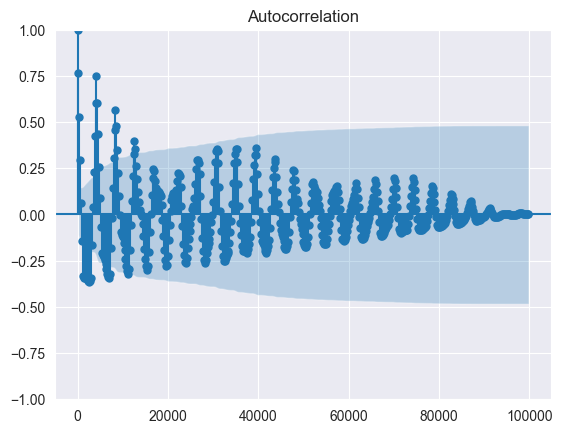

In [24]:
# Plot the autocorrelations for the relevant attributes
start_time = 10000
plotting_time = 100000
plt.clf()
plot_acf(relevant_train_data_df[["FIT101"]].iloc[: plotting_time, :], lags=list(range(0, plotting_time, 200)))
plt.show()

As can be seen in the plot above, the signal shows some cyclic behavior.

In [25]:
from statsmodels.tsa.stattools import acf

fit101_acf = acf(relevant_train_data_df[["FIT101"]].iloc[: plotting_time, :], nlags=plotting_time)[::200]
# Find 10 largest values in the acf
print(fit101_acf)
largest_acf_values = np.argsort(fit101_acf, axis=0)[-10:]
print(f"10 largest values in the acf: {largest_acf_values * 200}")

[ 1.00000000e+00  7.63081602e-01  5.29141835e-01  2.93594062e-01
  6.37937413e-02 -1.44368784e-01 -3.33698395e-01 -3.45618389e-01
 -3.46219512e-01 -3.37306164e-01 -3.41345791e-01 -3.51086139e-01
 -3.59139737e-01 -3.67651123e-01 -3.61817880e-01 -3.41374859e-01
 -1.64781376e-01  3.90559823e-02  2.32262960e-01  4.25688904e-01
  6.04754704e-01  7.47899266e-01  6.04738460e-01  4.33241078e-01
  2.59493779e-01  8.77943172e-02 -6.59622805e-02 -2.07254553e-01
 -2.21167827e-01 -2.31317070e-01 -2.46971393e-01 -2.68492643e-01
 -2.96338113e-01 -3.20137922e-01 -3.38419694e-01 -3.42493694e-01
 -3.19694374e-01 -1.81794002e-01 -1.75066719e-02  1.44884134e-01
  3.07615838e-01  4.56451616e-01  5.65339375e-01  4.76682499e-01
  3.46695518e-01  2.23696564e-01  1.02392699e-01 -1.14062616e-03
 -9.45929348e-02 -1.12301678e-01 -1.23106596e-01 -1.52426487e-01
 -1.93636791e-01 -2.41671099e-01 -2.80088923e-01 -3.05460643e-01
 -3.22134532e-01 -2.97363320e-01 -1.91123203e-01 -5.73468109e-02
  7.53353154e-02  2.07498

In [26]:
start_lag = 1
end_lag = 5001
interval = 500

We can deduce that the period of this signal is around 4200 as the autocorrelation has a large spike there. Thus, our first attempt will consider lags around this value.

In [27]:
# Use autoregression to predict the next values based on the previous ones

from sklearn.linear_model import ARDRegression


def get_features_targets(time_window_range, data, intervals=1, feature="FIT101"):
    # Collect arrays of the features and labels
    features = []
    targets = []
    signal_array = data[feature].to_numpy().squeeze()
    for i in range(time_window_range, len(data)):
        time_window = np.flip(signal_array[i - time_window_range:i:intervals])
        target = signal_array[i]
        features.append(time_window)
        targets.append(target)

    features = np.array(features)
    targets = np.array(targets)
    return features, targets


def predict_and_plot(features, targets, model):
    predictions = model.predict(features)
    residuals = predictions - targets
    plt.plot(residuals, label="Residuals")
    plt.legend()
    plt.show()


def run_model(time_window_range, data, intervals=1, feature="FIT101"):
    features, targets = get_features_targets(time_window_range, data, intervals, feature)
    ard = ARDRegression()
    ard.fit(features, targets)
    predict_and_plot(features, targets, ard)
    return ard


def get_ar_residuals(targets, predictions):
    return predictions - targets


In [28]:
ard = ARDRegression()
features, targets = get_features_targets(4200, relevant_train_data_df, intervals=2)

print(features.shape)
print(targets.shape)

(482600, 2100)
(482600,)


In [29]:
# Train the model
ard.fit(features, targets)

ARDRegression()

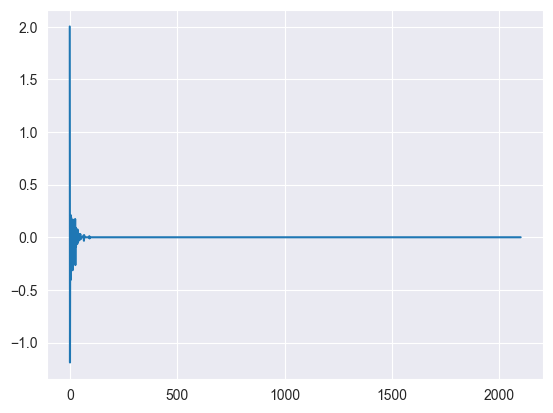

In [30]:
# Plot the coefficients
plt.plot(ard.coef_)

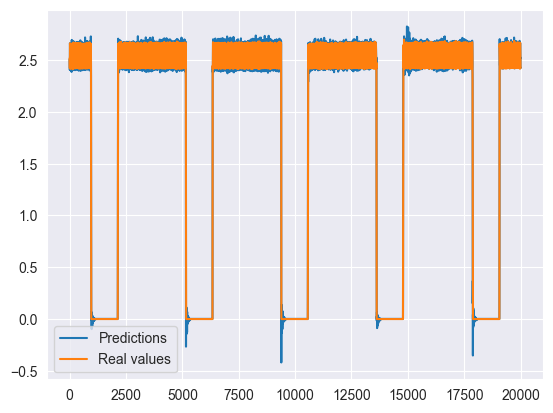

In [31]:
# Predict the values
predictions = ard.predict(features)
plt.plot(predictions[300000:320000], label="Predictions")
plt.plot(targets[300000:320000], label="Real values")
plt.legend()

As can be seen above, the predicted and real values are close to the real ones on larger scale.

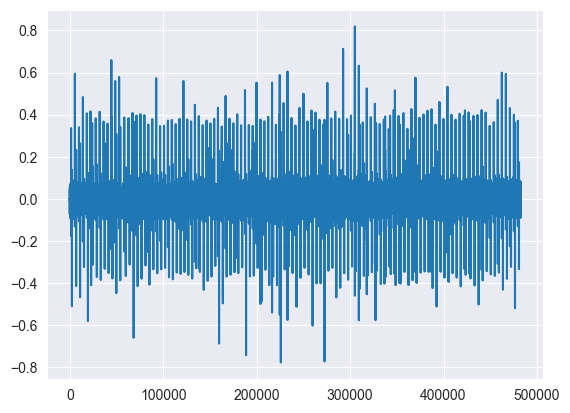

In [32]:
plt.clf()

train_residuals = get_ar_residuals(targets, predictions)
plt.plot(train_residuals)

Now taking the smaller time windows. As we can see, residual look similar.

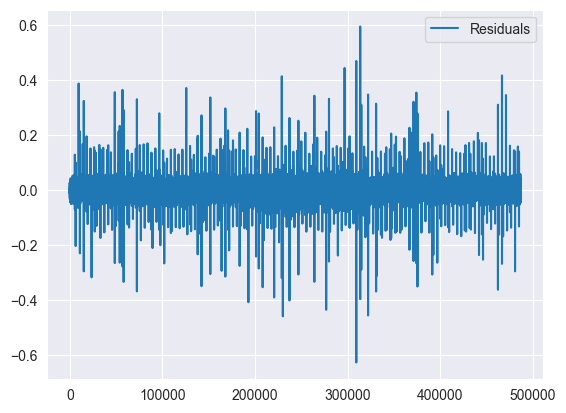

In [33]:
ard_small = run_model(100, relevant_train_data_df)

Taking different signals.

<Figure size 640x480 with 0 Axes>

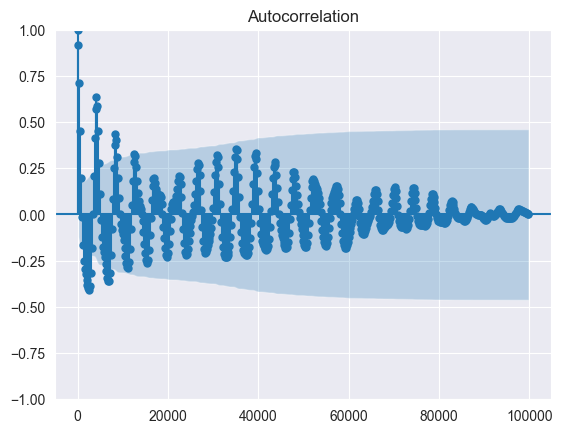

<Figure size 640x480 with 0 Axes>

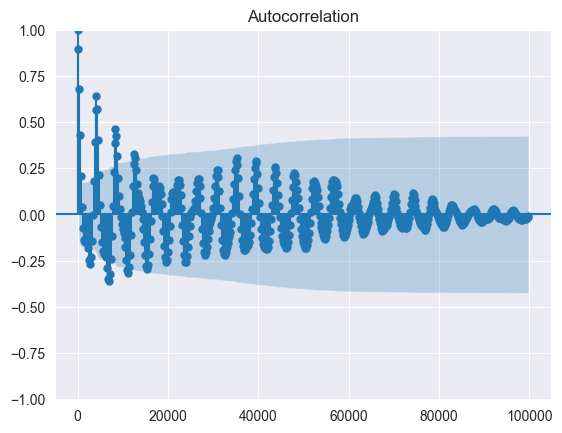

In [34]:
# Plot the autocorrelations for the signal LIT101
start_time = 10000
plotting_time = 100000
plt.clf()
plot_acf(relevant_train_data_df["LIT101"][: plotting_time], lags=list(range(0, plotting_time, 200)))
plt.show()

plt.clf()
plot_acf(relevant_train_data_df["LIT401"][: plotting_time], lags=list(range(0, plotting_time, 200)))
plt.show()

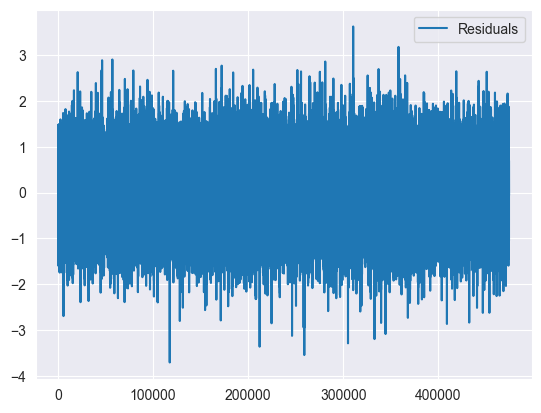

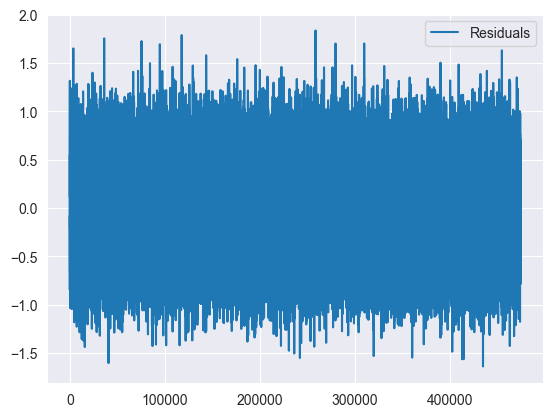

In [35]:
# Continous signals
LIT101_ar = run_model(2200, relevant_train_data_df[10000:], feature="LIT101", intervals=2)
LIT401_ar = run_model(2200, relevant_train_data_df[10000:], feature="LIT401", intervals=2)



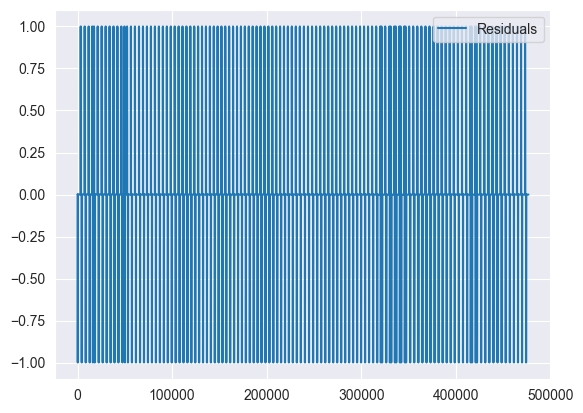

In [36]:
# Binary signals
P101_ar = run_model(100, relevant_train_data_df[10000:], feature="P101")

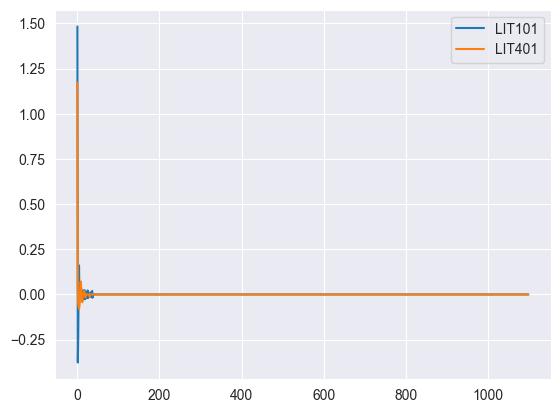

In [37]:
# Plot the coefficients
plt.clf()
plt.plot(LIT101_ar.coef_, label="LIT101")
plt.plot(LIT401_ar.coef_, label="LIT401")
plt.legend()
plt.show()

Applying differencing.

Id
10000          NaN
10001    -0.005445
10002     0.000000
10003     0.028505
10004     0.049002
            ...   
496795   -0.011209
496796   -0.011530
496797   -0.014092
496798   -0.006406
496799   -0.001281
Name: FIT101_diff, Length: 486800, dtype: float64


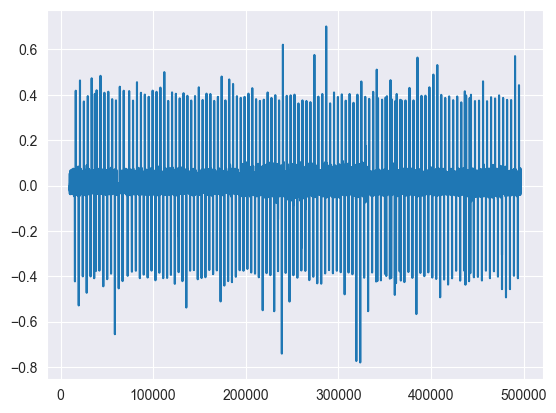

In [38]:
relevant_train_data_df["FIT101_diff"] = relevant_train_data_df["FIT101"].diff()
print(relevant_train_data_df["FIT101_diff"])
# Replace nan with zero
relevant_train_data_df["FIT101_diff"] = relevant_train_data_df["FIT101_diff"].fillna(0)

plt.plot(relevant_train_data_df["FIT101_diff"])
plt.show()

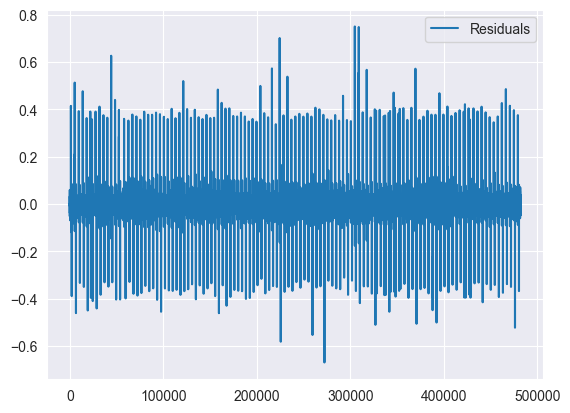

In [39]:
# Training the model
ard_FIT101_diff = run_model(4400, relevant_train_data_df, feature="FIT101_diff", intervals=5)

### 4b. Plots to study the detected anomalies

In [40]:
# Plot the anomalies
def find_anomalies(residuals, threshold):
    return np.where(np.abs(residuals) > threshold)[0]

def plot_threshold(residuals, threshold, true_anomalies=None, predicted_anomalies=None):
    plt.plot(residuals, label="Residual")
    plt.hlines(threshold, 0, len(residuals), label="Threshold", linestyle="--", color="red")
    plt.hlines(-threshold, 0, len(residuals), linestyle="--", color="red")

    if true_anomalies is not None:
        plt.scatter(true_anomalies, residuals[true_anomalies], label="True anomalies", color="green", s=20)

    if predicted_anomalies is not None:
        plt.scatter(predicted_anomalies, residuals[predicted_anomalies], label="Predicted anomalies", color="blue",
                    s=10)
    plt.legend()
    plt.show()


features, targets = get_features_targets(100, relevant_train_data_df)

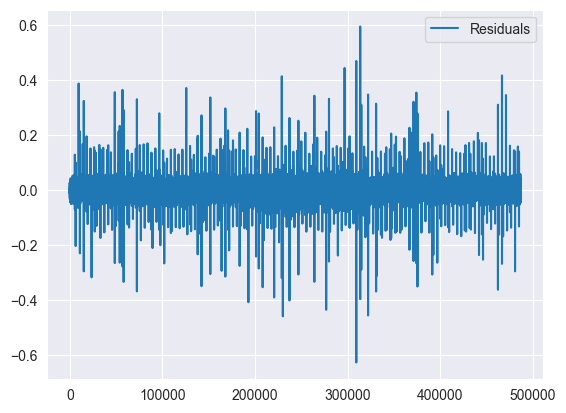

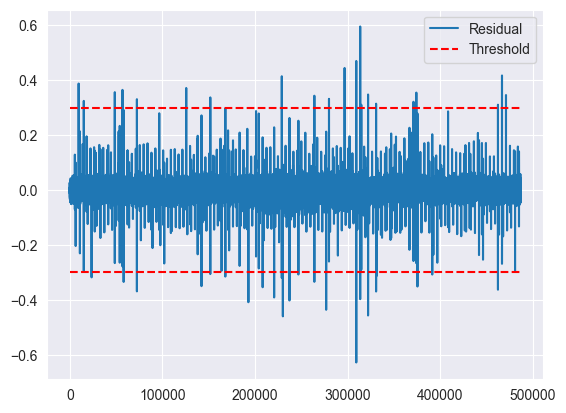

In [41]:
# Using the FIT101 signal
threshold = 0.3
ard_final = run_model(100, relevant_train_data_df)
train_residuals = get_ar_residuals(targets, ard_final.predict(features))
plot_threshold(train_residuals, threshold)


In [42]:
def validate_results(train_data, val_data, time_window_range, signal, threshold=None, interval=1):
    val_features, val_targets = get_features_targets(time_window_range, val_data, intervals=interval, feature=signal)
    train_features, train_targets = get_features_targets(time_window_range, train_data, intervals=interval,
                                                         feature=signal)

    model = ARDRegression()
    model.fit(train_features, train_targets)
    if threshold is None:
        # Threshold is determined using the validation set
        train_residuals = get_ar_residuals(train_targets, model.predict(train_features))
        threshold = np.max(np.abs(train_residuals))
    predictions = model.predict(val_features)
    val_residuals = get_ar_residuals(val_targets, predictions)
    predicted_anomalies = find_anomalies(val_residuals, threshold)
    true_anomalies = np.where(relevant_val_data_df["Label"] == 1)[0]
    plot_threshold(val_residuals, threshold, true_anomalies, predicted_anomalies)
    return predicted_anomalies, residuals

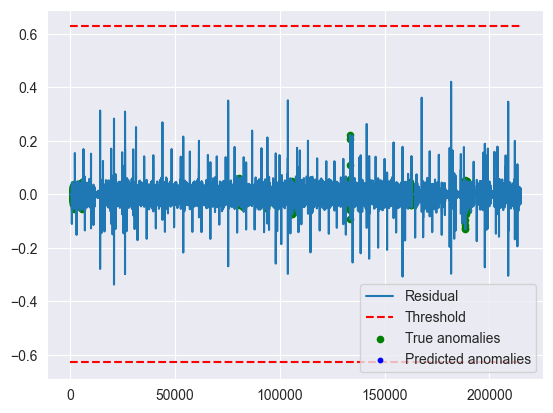

In [43]:
# The validation dataset FIT101
validation_signal = "FIT101"

anomalies, residuals = validate_results(relevant_train_data_df, relevant_val_data_df, 100, validation_signal)

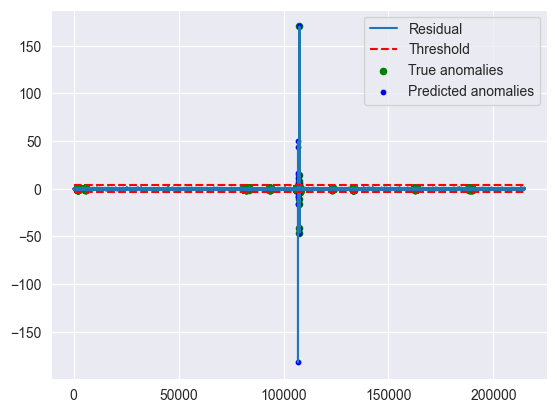

In [44]:
# The validation dataset LIT101
validation_signal = "LIT101"

LIT101_anomalies, LIT101_residuals =  validate_results(relevant_train_data_df, relevant_val_data_df, 100, validation_signal)

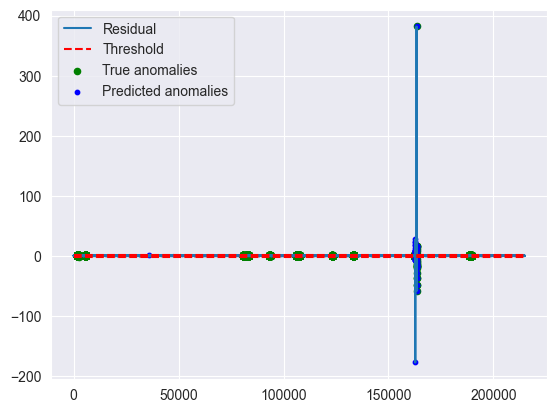

In [45]:
# The validation dataset LIT401
validation_signal = "LIT401"

LIT401_anomalies, LIT401_residuals = validate_results(relevant_train_data_df, relevant_val_data_df, 100, validation_signal)

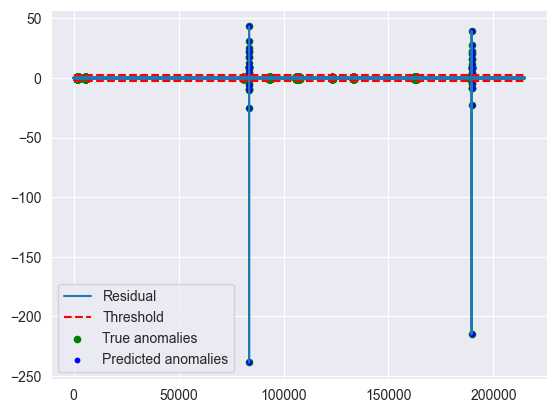

In [46]:
# The validation dataset LIT301
validation_signal = "LIT301"

LIT301_anomalies, LIT301_residuals = validate_results(relevant_train_data_df, relevant_val_data_df, 100, validation_signal)

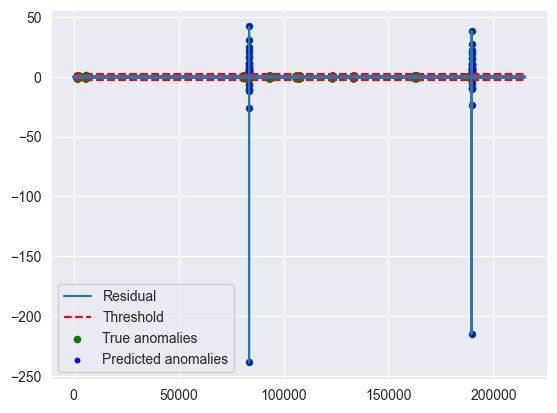

(array([ 83605,  83606,  83607,  83608,  83609,  83610,  83611,  83612,
         83613,  83614,  83615,  83616,  83618,  83619,  83620,  83621,
         83622,  83624,  83625,  83626,  83627,  83628,  83629,  83630,
         83631,  83642,  83643,  83644,  83645,  83646,  83647, 189616,
        189617, 189618, 189619, 189620, 189621, 189622, 189623, 189624,
        189625, 189626, 189627, 189629, 189630, 189631, 189632, 189633,
        189635, 189636, 189637, 189638, 189639, 189640, 189641, 189642,
        189653, 189654, 189655, 189656, 189657, 189658], dtype=int64),
 Id
 224959    2.438580
 224960    2.439346
 224961    2.424334
 224962    2.380146
 224963    2.375354
             ...   
 449914    2.891990
 449915    2.916629
 449916    2.926606
 449917    2.938391
 449918    2.933320
 Length: 224960, dtype: float64)

In [47]:
# The validation dataset with differencing
relevant_train_data_df["LIT301_diff"] = relevant_train_data_df["LIT301"].diff()
relevant_train_data_df["LIT301_diff"] = relevant_train_data_df["LIT301_diff"].fillna(0)
relevant_val_data_df["LIT301_diff"] = relevant_val_data_df["LIT301"].diff()
relevant_val_data_df["LIT301_diff"] = relevant_val_data_df["LIT301_diff"].fillna(0)

validation_signal = "LIT301_diff"

validate_results(relevant_train_data_df, relevant_val_data_df, 100, validation_signal)


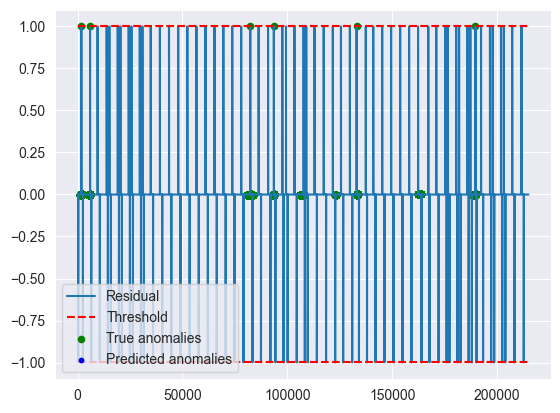

(array([], dtype=int64),
 Id
 224959    2.438580
 224960    2.439346
 224961    2.424334
 224962    2.380146
 224963    2.375354
             ...   
 449914    2.891990
 449915    2.916629
 449916    2.926606
 449917    2.938391
 449918    2.933320
 Length: 224960, dtype: float64)

In [48]:
# Try out binary signals
validation_signal = "P101"
validate_results(relevant_train_data_df, relevant_val_data_df, 100, validation_signal)

In [86]:
# Get predicted anomalies using the best performing signal LIT301
true_anomalies = np.where(relevant_val_data_df["Label"] == 1)[0]
# Calculate the metrics
tp, fp, tn, fn = calculate_statistics(LIT301_anomalies, true_anomalies)
accuracy_ar, precision_ar, recall_ar, f1_score_ar = calculate_metrics(tp, fp, tn, fn)
# Print the intersection of the predicted and true anomalies
print("Number of predicted anomalies: ", len(LIT301_anomalies))
print("Number of true anomalies: ", len(true_anomalies))
print("Intersection: ", np.intersect1d(LIT301_anomalies, true_anomalies))
print("Accuracy: ", accuracy_ar)
print("Precision: ", precision_ar)
print("Recall: ", recall_ar)
print("F1 score: ", f1_score_ar)

Number of predicted anomalies:  52
Number of true anomalies:  8255
Intersection:  [ 83605  83606  83607  83608  83609  83610  83611  83612  83613  83614
  83615  83616  83618  83619  83620  83621  83622  83624  83625  83626
  83627  83628  83629  83630  83631  83632 189616 189617 189618 189619
 189620 189621 189622 189623 189624 189625 189626 189627 189629 189630
 189631 189632 189633 189635 189636 189637 189638 189639 189640 189641
 189642 189643]
Accuracy:  0.9635355775941393
Precision:  1.0
Recall:  0.006299212598425197
F1 score:  0.012519561815336464


### 4c. Analysis and answers to the questions

Two sizes of sliding windows were tested to see if the size of the window has an impact on the performance of the model. The results show that the size of the window does not have a significant impact on the performance of the model and the difference in performance between the model with a window size of 100 and 4400 is negligible. While, a huge disadvantage of using a large window is its computational cost. Moreover, with larger time windows, we are not able to detect anomalies in the beginning of the measurements. Therefore, a window size of 100 was chosen for the rest of the analysis.
Even though most of the signals are periodically correlated, the correlation is not strong enough to make a long-term prediction useful.
The predictive performance did not seem to increase after applying differencing. This might be due to the fact that the signals are not periodic enough.
From the plots above, it is clear that the model is able to detect contextual anomalies (groups of anomalies) on a continuous data (sensors with continuous signals). Moreover, from the analysis on the validation set it looks like the model performs best on data coming from theLevel Transmitter sensors (LIT).

## 5. N-gram task – 1/2 A4 - Individual

### 5a. Visualise discretization

### 5b. Analysis and answers to the questions. Also provide relevant plots.

## 6.Comparision task 1 A4 - Individual

### 6a. Use the given guidelines and provide a comparision of the above implemented methods.

To analyze the differences between the four methods, we have calculated the accuracy, precision, recall and F1 score for each of them using the validation datasets and thresholds derived from the training datasets. By choosing these metrics, we believe that we are able to evaluate the performance of the models in a more comprehensive way. Depending on the use case, sometimes it is more important to focus on identifying all the anomalies (high recall) and sometimes it is more important to focus on identifying only the true anomalies (high precision). In some other cases, both recall and precision are equally important (F1 score). Finally, accuracy is a good metric to evaluate the overall performance of the model. The results of our analysis can be seen below.

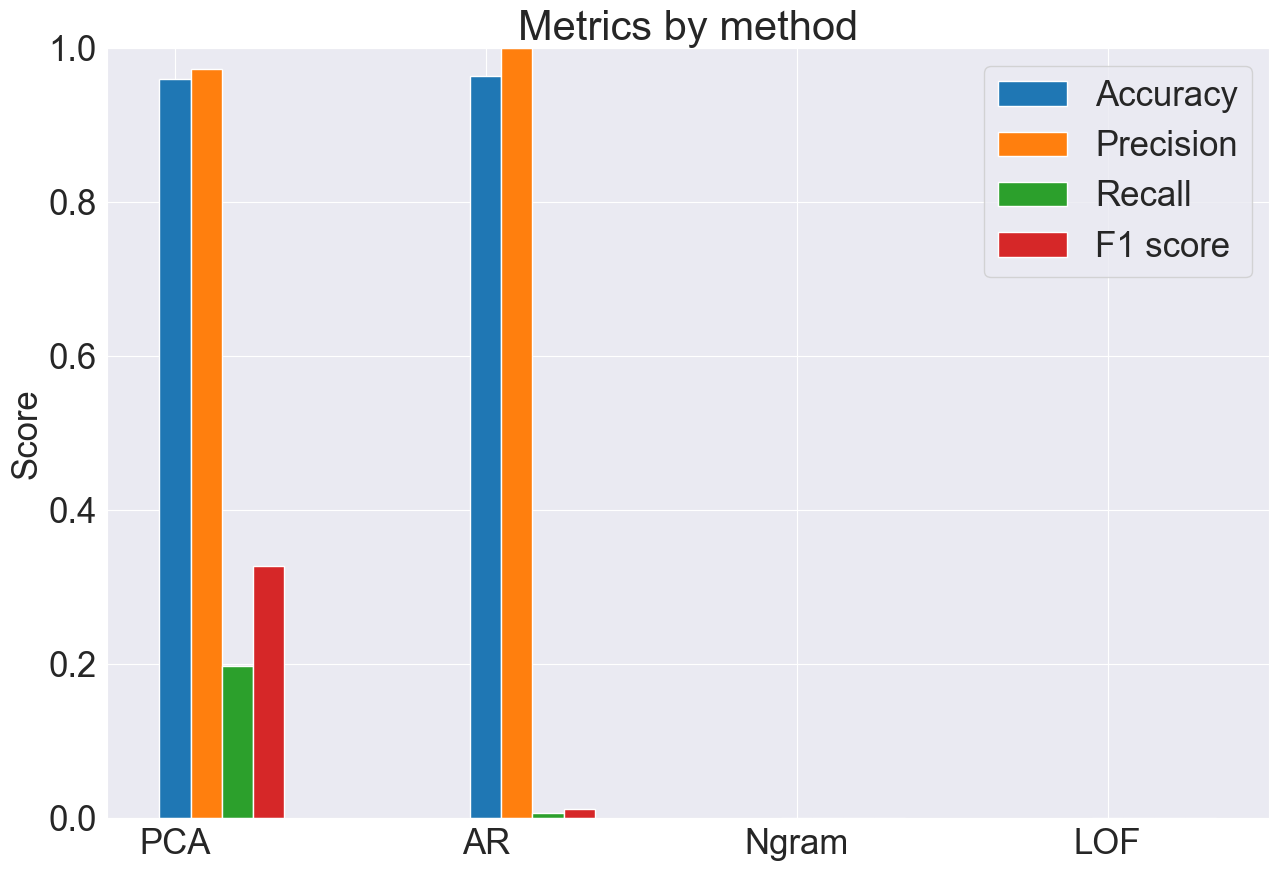

In [83]:
import matplotlib.pyplot as plt

methods = ("PCA", "AR", "Ngram", "LOF")
metrics = {
    'Accuracy': (accuracy_pca, accuracy_ar, 0, 0),
    'Precision': (precision_pca, precision_ar, 0, 0),
    'Recall': (recall_pca, recall_ar, 0, 0),
    'F1 score': (f1_score_pca, f1_score_ar, 0, 0)
}

x = np.arange(len(methods))  # the label locations
width = 0.1  # the width of the bars
multiplier = 0

# Increase the figure size
fig, ax = plt.subplots(figsize=(15, 10))

for attribute, measurement in metrics.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Metrics by method')
ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.legend()
ax.set_ylim(0, 1)

plt.show()


## 7. Bonus Task 1 A4

### 7a. Provide implementation and analysis.